$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [ ]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('Data/test.csv')

<ipython-input-115-354a0eace2b4>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


####  show the dataset

In [ ]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
X=train.drop('Credit_Score',axis=1)
y=train['Credit_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 27), (20000, 27), (80000,), (20000,))

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=1234)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 27), (6000, 27), (80000,), (6000,))

#### show the columns of dataset

In [ ]:
X_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

#### show some information about dataset

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 59428 to 92975
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        80000 non-null  object 
 1   Customer_ID               80000 non-null  object 
 2   Month                     80000 non-null  object 
 3   Name                      72040 non-null  object 
 4   Age                       80000 non-null  object 
 5   SSN                       80000 non-null  object 
 6   Occupation                80000 non-null  object 
 7   Annual_Income             80000 non-null  object 
 8   Monthly_Inhand_Salary     67927 non-null  float64
 9   Num_Bank_Accounts         80000 non-null  int64  
 10  Num_Credit_Card           80000 non-null  int64  
 11  Interest_Rate             80000 non-null  int64  
 12  Num_of_Loan               80000 non-null  object 
 13  Type_of_Loan              70891 non-null  object 
 14  Delay_f

#### check number of unique values for each column

In [ ]:
X_train.nunique()

,0
ID,80000
Customer_ID,12500
Month,8
Name,10139
Age,1510
SSN,12501
Occupation,16
Annual_Income,17863
Monthly_Inhand_Salary,13172
Num_Bank_Accounts,804


#### Check the duplicated

In [ ]:
X_train.duplicated().sum()

0

#### Check the missing values in each column

In [ ]:
X_train.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,7960
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,12073
Num_Bank_Accounts,0


#### Check persentage of missing values for each column

In [ ]:
missing_percentage_train = (X_train.isna().sum() / len(X_train)) * 100
missing_percentage_train

,0
ID,0.00000
Customer_ID,0.00000
Month,0.00000
Name,9.95000
Age,0.00000
SSN,0.00000
Occupation,0.00000
Annual_Income,0.00000
Monthly_Inhand_Salary,15.09125
Num_Bank_Accounts,0.00000


#### Check sum statistical analysis

In [ ]:
X_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,67927.000000,80000.000000,80000.000000,80000.000000,80000.000000,78445.000000,80000.000000,80000.000000
mean,4190.984620,17.265037,22.548125,72.517900,21.075662,27.745363,32.270396,1402.323197
std,3181.680323,118.894881,129.440226,468.031523,14.862218,193.113420,5.121102,8289.035304
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.100770,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.025370,30.118977
50%,3089.424167,6.000000,5.000000,13.000000,18.000000,6.000000,32.303648,69.100853
75%,5952.307500,7.000000,7.000000,20.000000,28.000000,9.000000,36.496767,160.970391
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82256.000000


## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

In [ ]:
X_train.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


#### Show the correlation between columns specific numeric

In [ ]:
numeric=X_train.select_dtypes(include=['int64','float64'])
numeric

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
59428,5696.237500,8,5,18,27,0.0,39.224627,92.888270
51959,NaN,7,4,9,18,4.0,27.221135,16.547212
63188,NaN,8,5,31,44,12.0,33.204489,187.425136
99613,5298.447500,3,5,20,15,3.0,33.682697,8323.000000
57804,540.002917,8,8,18,60,11.0,31.286252,13.723019
...,...,...,...,...,...,...,...,...
89460,3457.666667,3,3,3519,5,6.0,28.707942,42721.000000
60620,1761.189583,0,7,9,19,1.0,33.436247,55.418583
34086,3659.411208,8,8,33,27,9.0,25.311408,355.346996
58067,1680.373750,1,3,11,3,0.0,26.338920,11.062812


#### Show the distribuation of Monthly_Inhand_Salary column

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

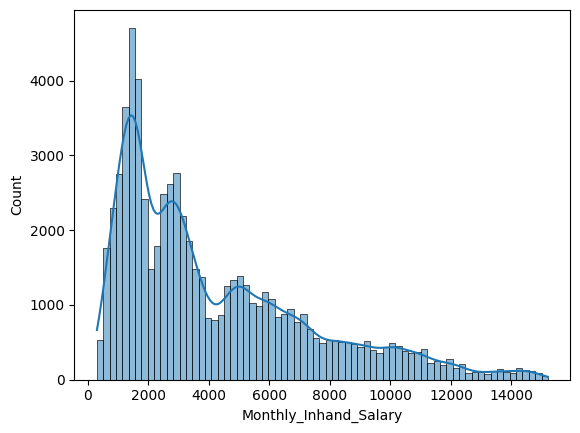

In [ ]:
sns.histplot(X_train['Monthly_Inhand_Salary'],kde=True)

Insight:
The distribuation of Monthly_Inhand_Salary is right skewed

#### Replace the _  for each value in column Num_of_Delayed_Payment

In [ ]:
X_train['Num_of_Delayed_Payment'] = X_train['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')

In [ ]:
X_train['Num_of_Delayed_Payment'].unique()

array(['8', 'nan', '17', '13', '2', '6', '1', '18', '21', '10', '20',
       '15', '22', '9', '23', '12', '25', '1192', '7', '19', '16', '11',
       '24', '5', '14', '4', '3955', '0', '-3', '27', '3', '26', '4011',
       '133', '3869', '-1', '28', '415', '1073', '594', '1473', '933',
       '-2', '3245', '4178', '3300', '2860', '2569', '4340', '3861',
       '4344', '2015', '1502', '2793', '2080', '3103', '969', '733',
       '3484', '1735', '2457', '1884', '3043', '4281', '867', '1079',
       '2185', '3251', '2801', '2875', '3880', '4022', '130', '3392',
       '2044', '2300', '3099', '2529', '1743', '3050', '1792', '3738',
       '519', '3200', '3894', '3636', '3559', '1941', '372', '4292',
       '1087', '175', '3684', '1946', '3511', '3112', '4298', '2810',
       '2397', '1106', '1636', '3404', '3216', '4172', '1976', '3478',
       '4251', '508', '1150', '2138', '4337', '739', '3491', '3661',
       '3415', '2697', '2354', '905', '1177', '3489', '3336', '2506',
       '1749', 

#### Show the unique values in Occupation column

In [ ]:
train['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

#### Show the value counts in Occupation column

In [ ]:
train['Occupation'].value_counts().sort_values(ascending=False)

,count
Occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


#### Show the visual of the Occupation column

<Axes: xlabel='count', ylabel='Occupation'>

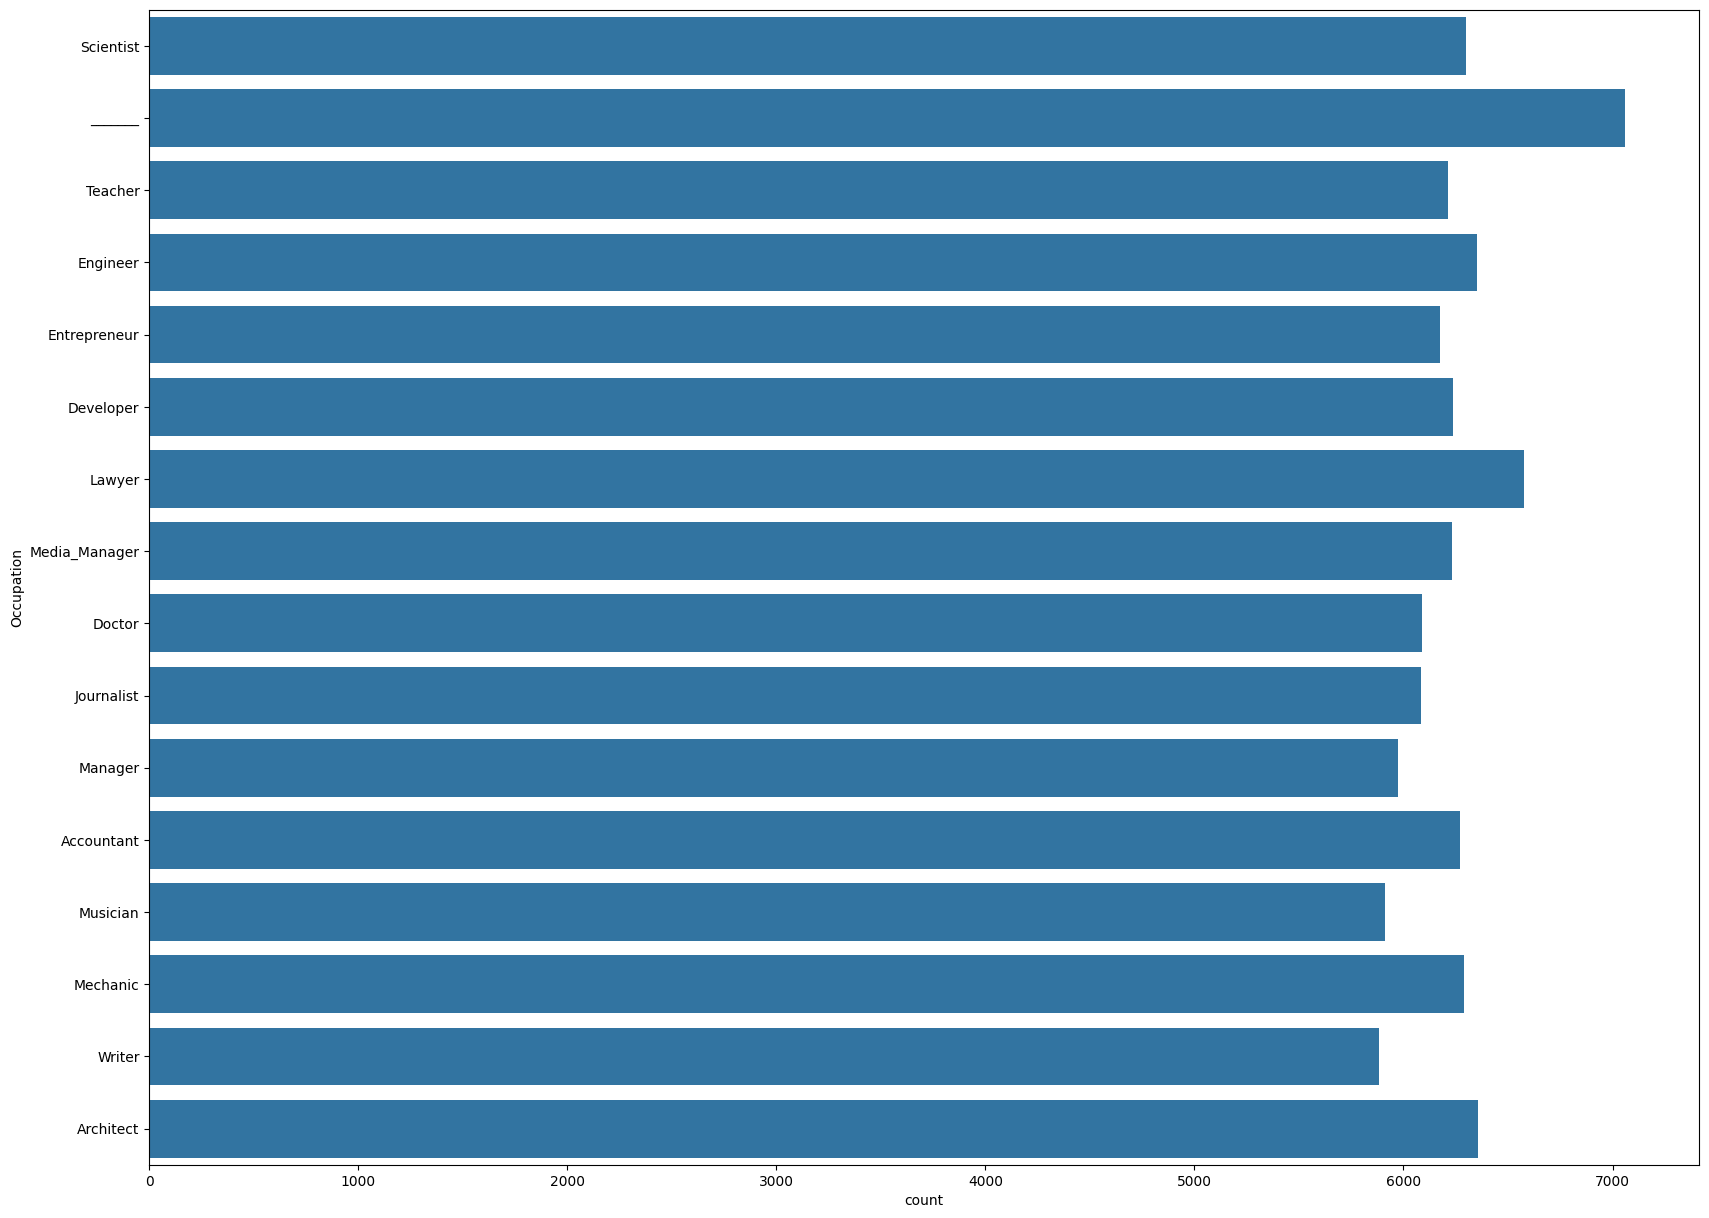

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(y=train['Occupation'])

Inight:
the six greater values in this column are ______ , Lawyer ,Architect, Engineer, Scientist, Mechanic         

<Axes: xlabel='Credit_Score', ylabel='count'>

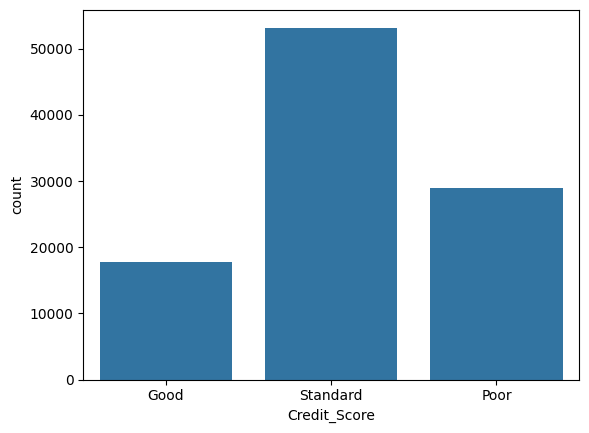

In [ ]:
sns.countplot(x=y)

Insight:
- we have three classes in target column.
- the standard value is the most frequency in Credit_Score.

#### Check unique value in Age column and value counts to can ditribute this column

In [ ]:
X_train['Age'].unique()

array(['41', '54', '19', ..., '6733', '2484', '4824'], dtype=object)

There is alot of unclean value that countain in this column

In [ ]:
X_train['Age'].value_counts().sort_values(ascending=False)

,count
Age,
28,2314
38,2284
31,2254
26,2249
25,2203
...,...
6227,1
7553,1
5373_,1


#### Show the statistical analysis for the age column

In [ ]:
X_train['Age'].describe()

,Age
count,80000
unique,1510
top,28
freq,2314


In [ ]:
X_train['Age'].unique()

array(['41', '54', '19', ..., '6733', '2484', '4824'], dtype=object)

#### Show the visual of Credit_Mix column

In [ ]:
X_train['Credit_Mix'].unique()

array(['Standard', '_', 'Good', 'Bad'], dtype=object)

<Axes: xlabel='Credit_Mix', ylabel='count'>

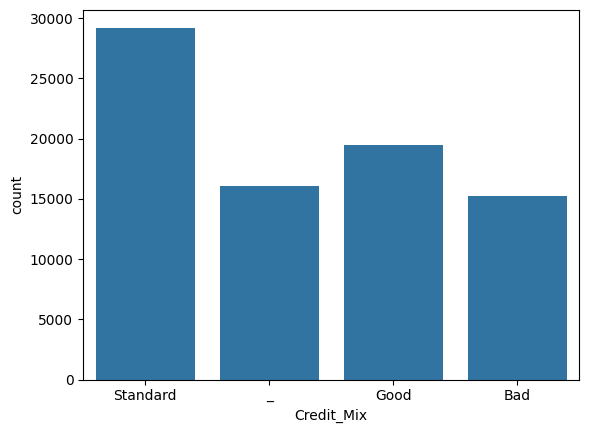

In [ ]:
sns.countplot(x=X_train['Credit_Mix'])

Insight:
- there are four unique value in the Credit_Mix column
- the most frequent one is

#### Check unique values of the type of loan ,value_counts

In [ ]:
X_train['Type_of_Loan'].unique()

array(['Auto Loan, and Personal Loan', 'Payday Loan',
       'Student Loan, Home Equity Loan, Auto Loan, Home Equity Loan, Debt Consolidation Loan, Personal Loan, Not Specified, Debt Consolidation Loan, and Not Specified',
       ...,
       'Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan',
       'Payday Loan, Credit-Builder Loan, Not Specified, and Payday Loan',
       'Not Specified, Mortgage Loan, Not Specified, Debt Consolidation Loan, Auto Loan, and Student Loan'],
      dtype=object)

In [ ]:
X_train['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
Not Specified,1113
Personal Loan,1022
Credit-Builder Loan,1018
Debt Consolidation Loan,996
Payday Loan,979
...,...
"Mortgage Loan, Debt Consolidation Loan, Auto Loan, Not Specified, and Payday Loan",3
"Not Specified, Mortgage Loan, Not Specified, Debt Consolidation Loan, Auto Loan, and Student Loan",3
"Debt Consolidation Loan, Credit-Builder Loan, Student Loan, Auto Loan, Payday Loan, Auto Loan, and Payday Loan",3


#### get the top five values of Type_of_Loan column

In [ ]:
top_five_Type_Loan=X_train['Type_of_Loan'].value_counts().sort_values(ascending=False)[:5]
top_five_Type_Loan

,count
Type_of_Loan,
Not Specified,1113
Personal Loan,1022
Credit-Builder Loan,1018
Debt Consolidation Loan,996
Payday Loan,979


- Not Specified ,Credit-Builder Loan, Personal Loan, Debt Consolidation Loan , Student Loan        
  the top five

#####  convert the output into dataframe

In [ ]:
df_Top_Type_loan=pd.DataFrame(top_five_Type_Loan)
df_Top_Type_loan

,count
Type_of_Loan,
Not Specified,1113
Personal Loan,1022
Credit-Builder Loan,1018
Debt Consolidation Loan,996
Payday Loan,979


#### show the visual of the top five in Type_of_Loan,what is the most frequent of them

In [ ]:
df_Top_Type_loan = df_Top_Type_loan.reset_index()
df_Top_Type_loan.columns = ['Type_of_Loan', 'Count']

In [ ]:
df_Top_Type_loan

,Type_of_Loan,Count
0,Not Specified,1113
1,Personal Loan,1022
2,Credit-Builder Loan,1018
3,Debt Consolidation Loan,996
4,Payday Loan,979


<Axes: xlabel='Type_of_Loan', ylabel='Count'>

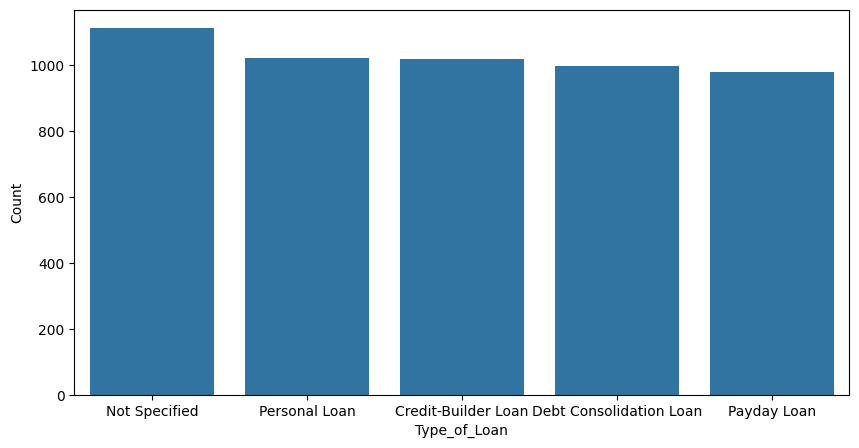

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_Top_Type_loan['Type_of_Loan'],y=df_Top_Type_loan['Count'])

- the largest is not Specified

#### visual of Type_of_Loan column

<Axes: xlabel='count', ylabel='Type_of_Loan'>

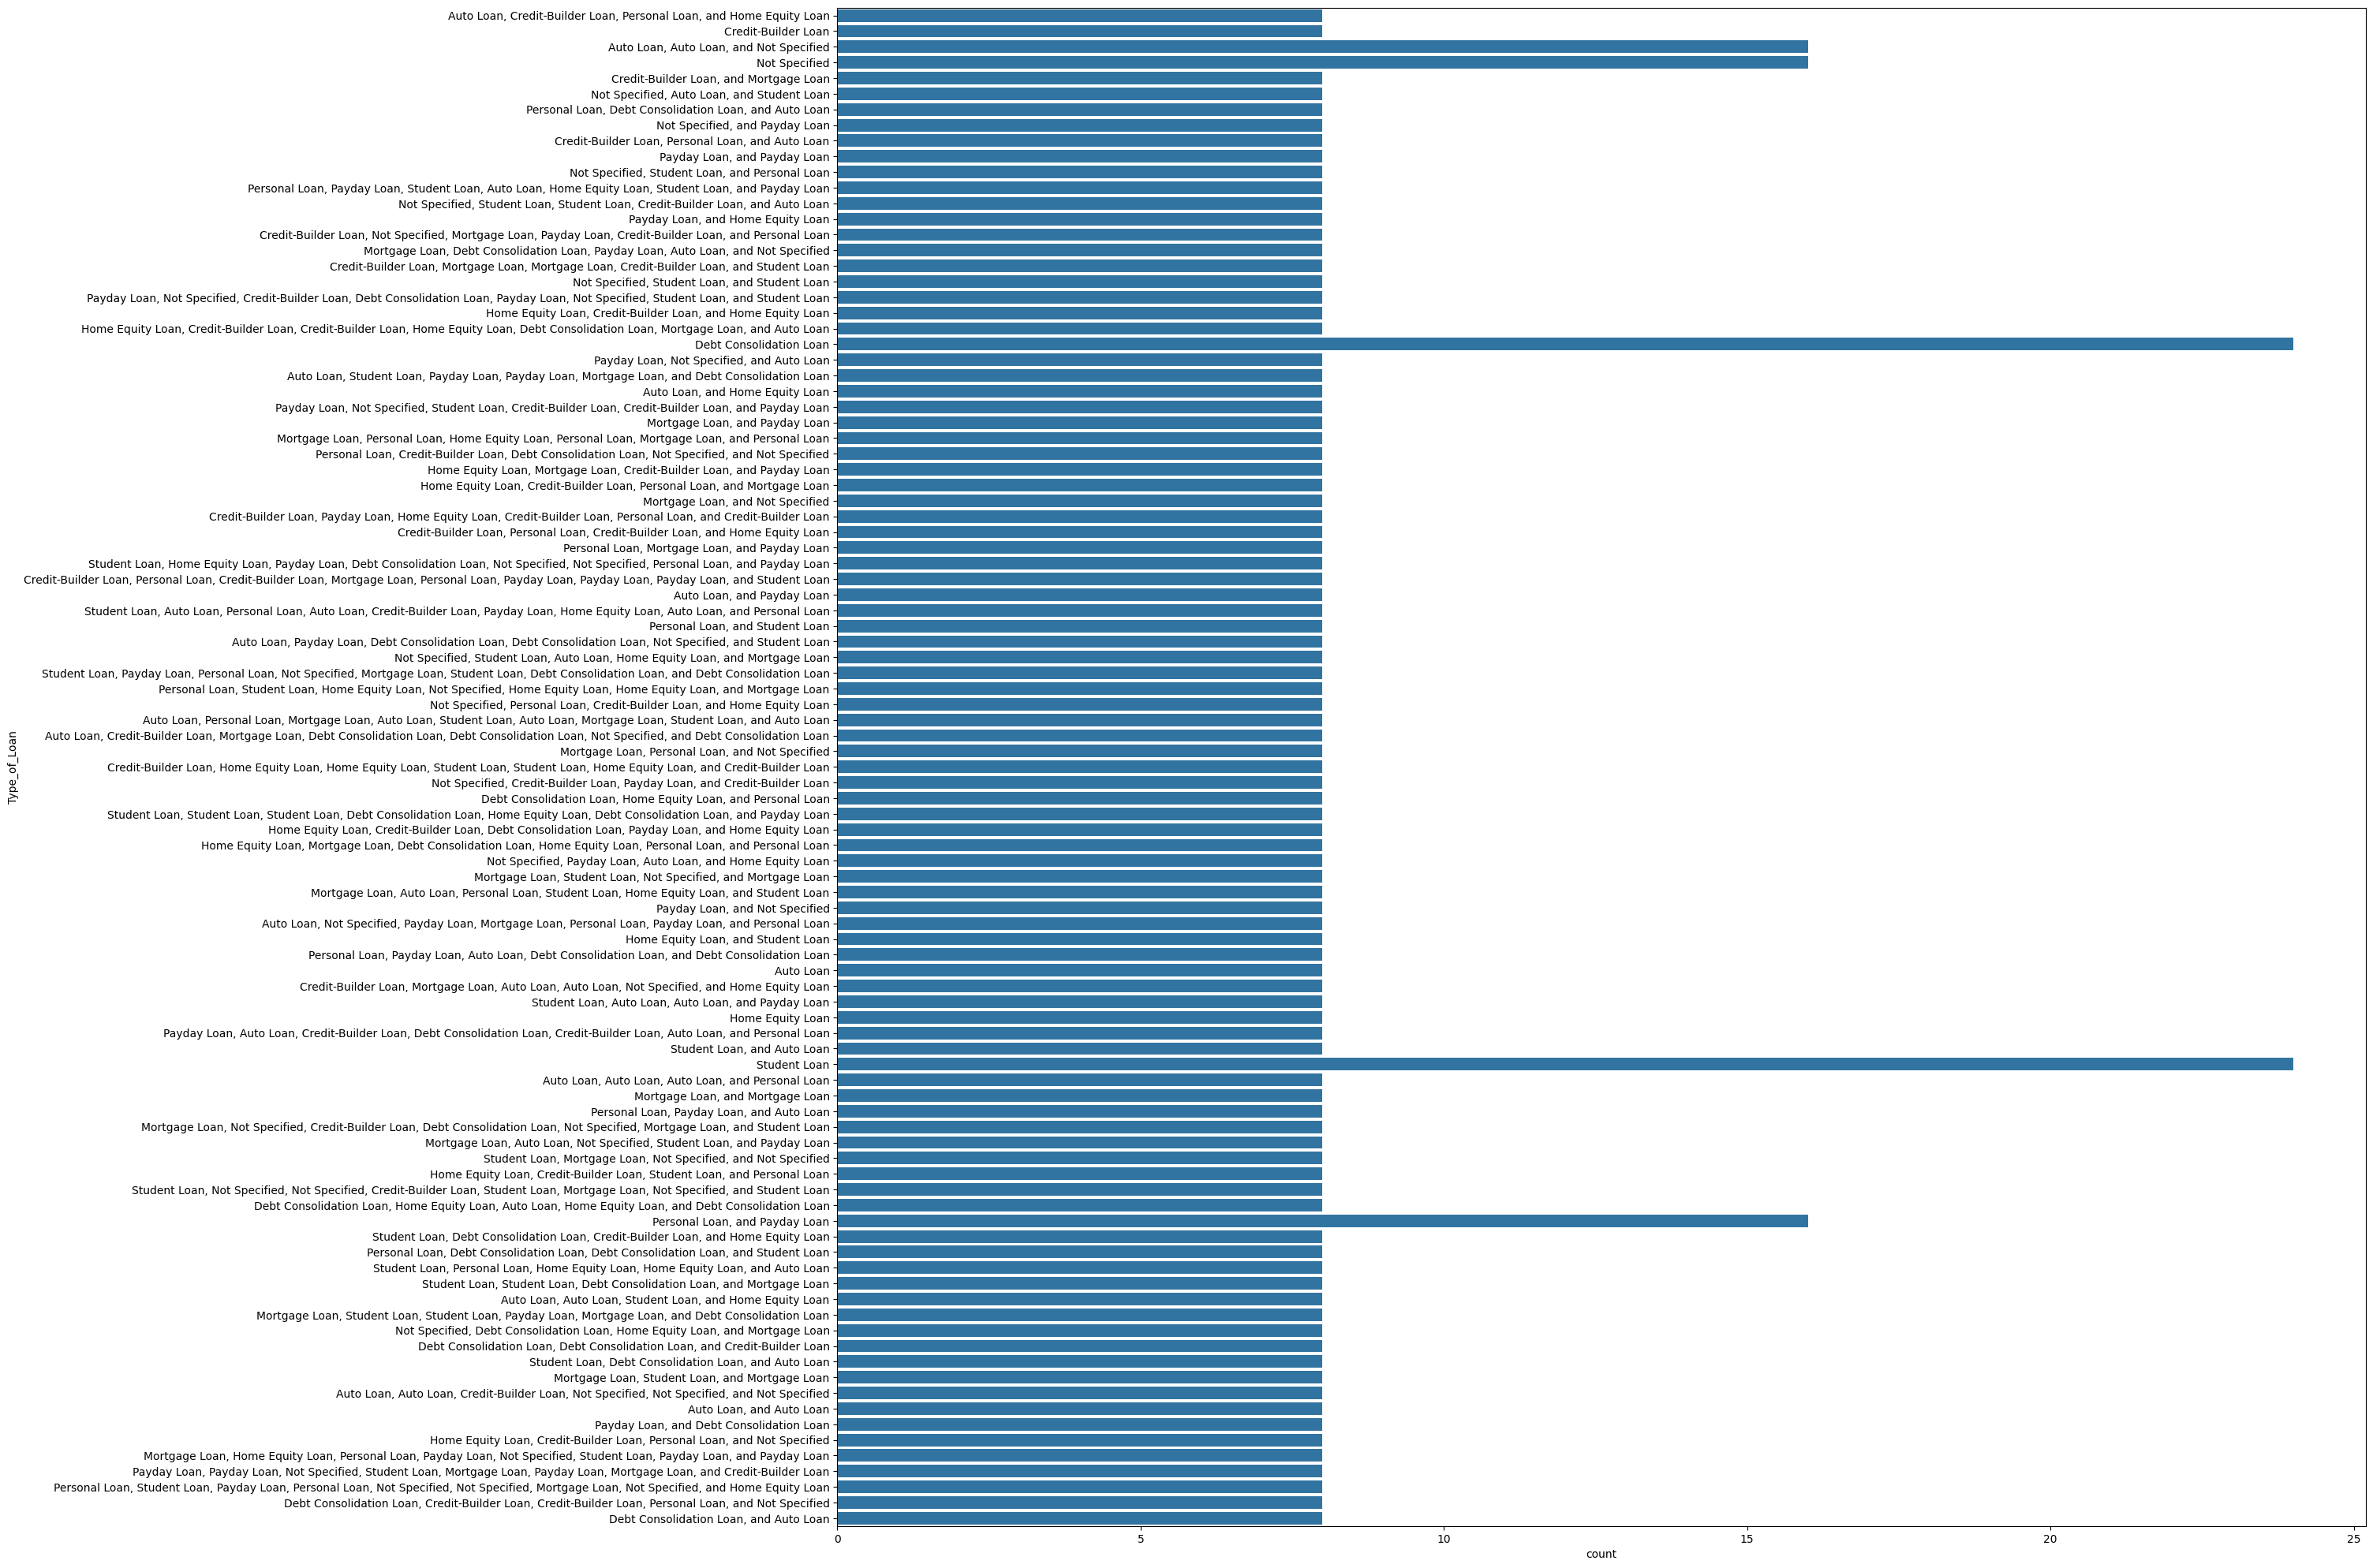

In [ ]:
plt.figure(figsize=(25,25))
sns.countplot(y=train['Type_of_Loan'][:1000])

#### show count plot of Type_of_Loan

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

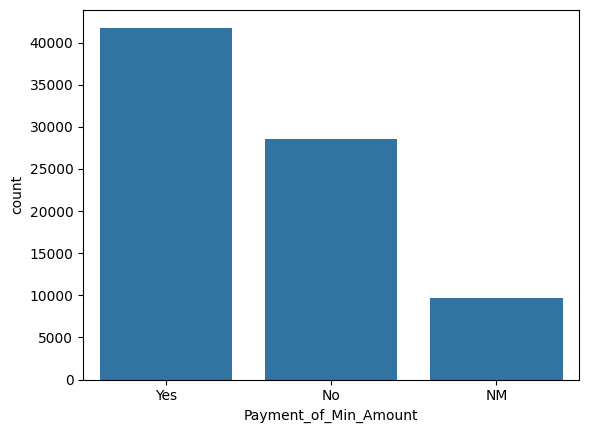

In [ ]:
sns.countplot(x=X_train['Payment_of_Min_Amount'])

##### Insight:

the largest Payment_of_Min_Amount  is yes

#### Show the visual Payment_Behaviour before cleaning

In [ ]:
X_train['Payment_Behaviour'].unique()

array(['High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments', '!@9#%8'], dtype=object)

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

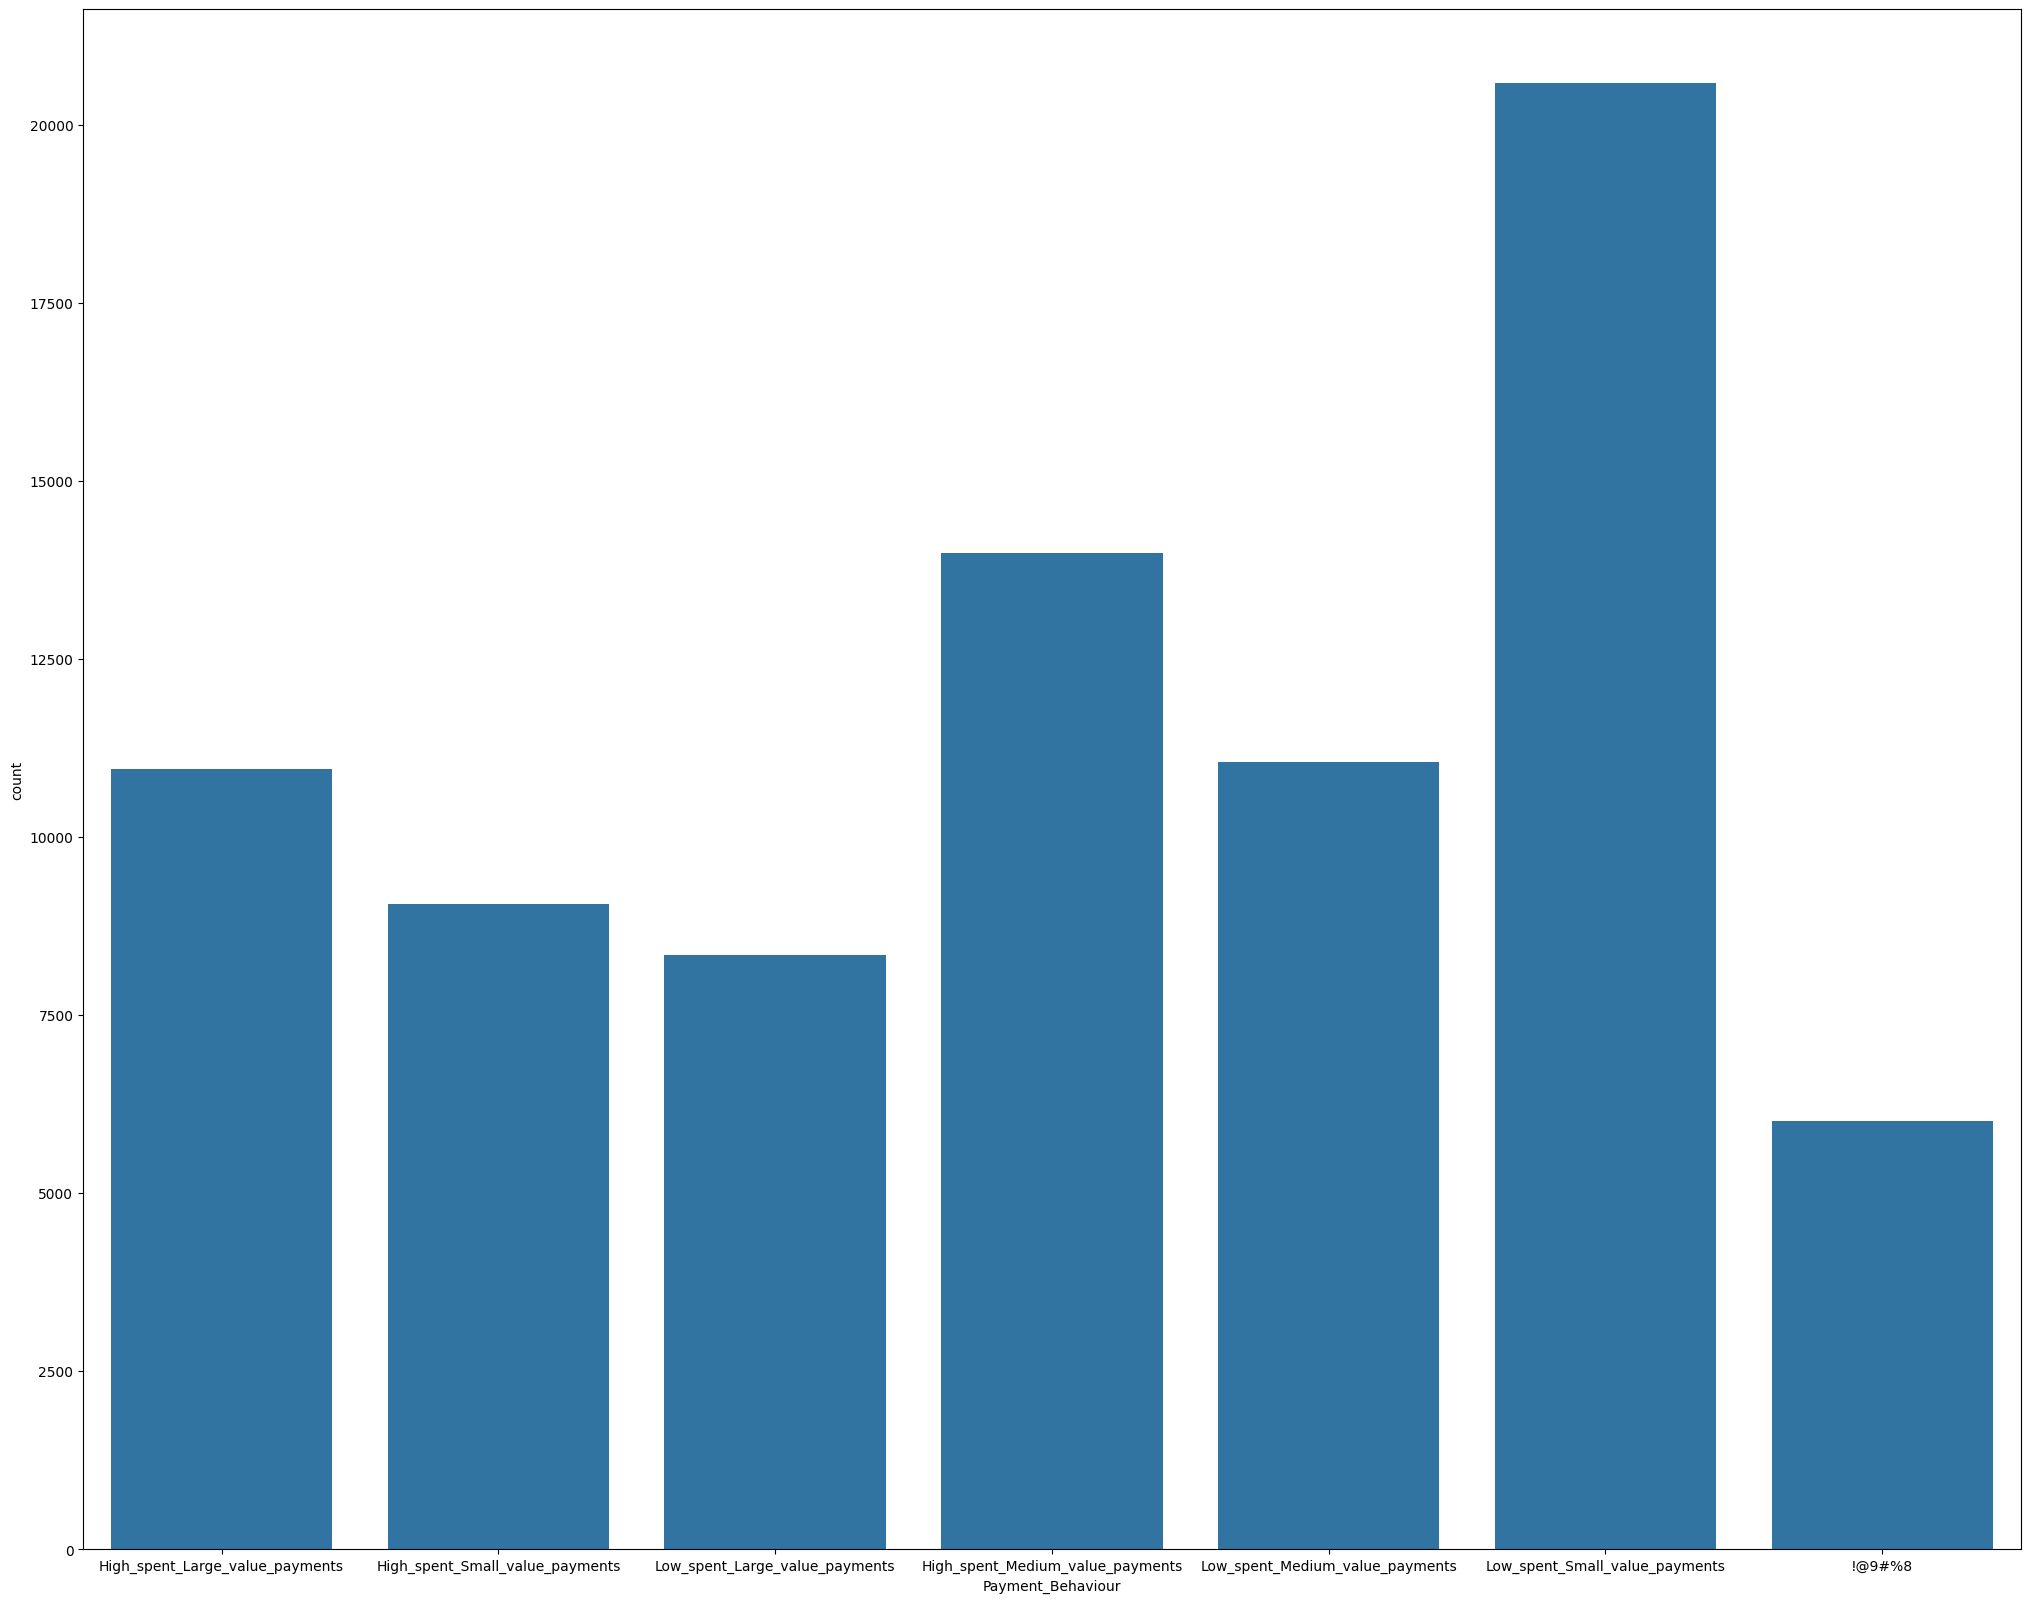

In [ ]:
plt.figure(figsize=(25,20))
sns.countplot(x=X_train['Payment_Behaviour'])

-the largest unique value Low_spent_Small_value_payments ,there is one unique is unknown ('!@9#%8')

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [ ]:
X_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
59428,0x17236,CUS_0x3ec1,May,ent,41,969-31-8219,Musician,70154.85,5696.237500,8,...,0.0,Standard,487.42,39.224627,21 Years and 0 Months,Yes,92.888270,87.63253757974445,High_spent_Large_value_payments,629.1029424808312
51959,0x14671,CUS_0x4d8b,August,NaN,54,662-45-6089,Accountant,29508.41,NaN,7,...,4.0,Standard,333.86,27.221135,19 Years and 9 Months,No,16.547212,32.35159606871025,High_spent_Large_value_payments,448.70460839846544
63188,0x1883e,CUS_0x3f89,May,Luciag,19,895-18-0686,Writer,31346.22,NaN,8,...,12.0,_,1795.98,33.204489,8 Years and 11 Months,Yes,187.425136,82.92423393046731,High_spent_Small_value_payments,238.96913003409344
99613,0x25dab,CUS_0x2829,June,Alistair Barre,32,#F%$D@*&8,Journalist,64901.37,5298.447500,3,...,3.0,Standard,442.06,33.682697,31 Years and 3 Months,Yes,8323.000000,97.85991319033951,High_spent_Small_value_payments,691.984837
57804,0x168b2,CUS_0x3b6e,May,Pineauf,32,224-83-2459,Scientist,7200.035,540.002917,8,...,11.0,Standard,2442.56,31.286252,14 Years and 2 Months,Yes,13.723019,NaN,Low_spent_Large_value_payments,294.97552351633345


#### drop some columns

In [ ]:
new_X_train=X_train.drop(columns=['ID','SSN','Name'])

In [ ]:
new_X_train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
59428,CUS_0x3ec1,May,41,Musician,70154.85,5696.237500,8,5,18,814,...,0.0,Standard,487.42,39.224627,21 Years and 0 Months,Yes,92.888270,87.63253757974445,High_spent_Large_value_payments,629.1029424808312
51959,CUS_0x4d8b,August,54,Accountant,29508.41,NaN,7,4,9,1,...,4.0,Standard,333.86,27.221135,19 Years and 9 Months,No,16.547212,32.35159606871025,High_spent_Large_value_payments,448.70460839846544
63188,CUS_0x3f89,May,19,Writer,31346.22,NaN,8,5,31,9,...,12.0,_,1795.98,33.204489,8 Years and 11 Months,Yes,187.425136,82.92423393046731,High_spent_Small_value_payments,238.96913003409344
99613,CUS_0x2829,June,32,Journalist,64901.37,5298.447500,3,5,20,0,...,3.0,Standard,442.06,33.682697,31 Years and 3 Months,Yes,8323.000000,97.85991319033951,High_spent_Small_value_payments,691.984837
57804,CUS_0x3b6e,May,32,Scientist,7200.035,540.002917,8,8,18,3,...,11.0,Standard,2442.56,31.286252,14 Years and 2 Months,Yes,13.723019,NaN,Low_spent_Large_value_payments,294.97552351633345


In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,12073
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0


#### clean age column

In [ ]:
def replace_value(col):
    train[col] = train[col].astype(str).str.replace('_', '')
    train[col] = train[col].astype(str).str.replace('-', '')
    return train[col]

In [ ]:
new_X_train['Age']=replace_value('Age')
new_X_train['Age']

,Age
59428,41
51959,54
63188,19
99613,32
57804,32
...,...
89460,44
60620,29
34086,24
58067,44


#### convert Age column into numeric

In [ ]:
new_X_train['Age']=pd.to_numeric(new_X_train['Age'],downcast='float')

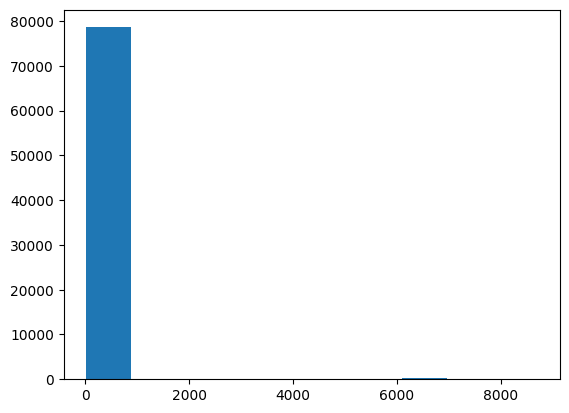

In [ ]:
plt.hist(new_X_train['Age'])
plt.show()

In [ ]:
new_X_train['Age'].unique()

array([  41.,   54.,   19., ..., 6733., 2484., 4824.], dtype=float32)

In [ ]:
new_X_train['Age'].dtype

dtype('float32')

In [ ]:
new_X_train['Age']=pd.to_numeric(new_X_train['Age'],downcast='float')

In [ ]:
new_X_train['Age'].dtype

dtype('float32')

In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,12073
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0


In [ ]:
median_age = new_X_train['Age'].median()
new_X_train['Age'] = new_X_train['Age'].apply(lambda x: median_age if x > 100 else x)

In [ ]:
new_X_train.head()


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
59428,CUS_0x3ec1,May,41.0,Musician,70154.85,5696.237500,8,5,18,814,...,0.0,Standard,487.42,39.224627,21 Years and 0 Months,Yes,92.888270,87.63253757974445,High_spent_Large_value_payments,629.1029424808312
51959,CUS_0x4d8b,August,54.0,Accountant,29508.41,NaN,7,4,9,1,...,4.0,Standard,333.86,27.221135,19 Years and 9 Months,No,16.547212,32.35159606871025,High_spent_Large_value_payments,448.70460839846544
63188,CUS_0x3f89,May,19.0,Writer,31346.22,NaN,8,5,31,9,...,12.0,_,1795.98,33.204489,8 Years and 11 Months,Yes,187.425136,82.92423393046731,High_spent_Small_value_payments,238.96913003409344
99613,CUS_0x2829,June,32.0,Journalist,64901.37,5298.447500,3,5,20,0,...,3.0,Standard,442.06,33.682697,31 Years and 3 Months,Yes,8323.000000,97.85991319033951,High_spent_Small_value_payments,691.984837
57804,CUS_0x3b6e,May,32.0,Scientist,7200.035,540.002917,8,8,18,3,...,11.0,Standard,2442.56,31.286252,14 Years and 2 Months,Yes,13.723019,NaN,Low_spent_Large_value_payments,294.97552351633345


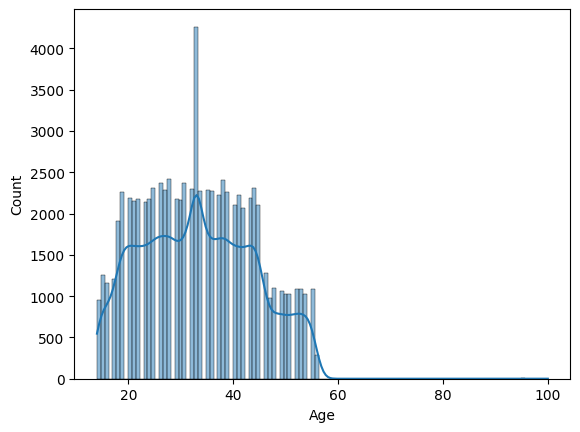

In [ ]:
sns.histplot(new_X_train['Age'],kde=True)
plt.show()

#### Encoding The Month column

In [ ]:
new_X_train['Month'].unique()

array(['May', 'August', 'June', 'March', 'February', 'July', 'April',
       'January'], dtype=object)

<ipython-input-172-9b7325bc8dbb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_X_train['Month'],palette="coolwarm")


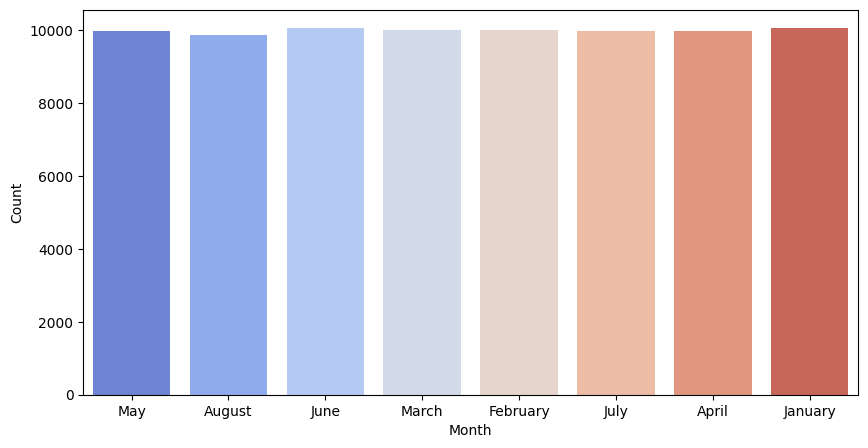

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=new_X_train['Month'],palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [ ]:
month_encoding = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}

new_X_train['Month'] = new_X_train['Month'].map(month_encoding)

- Insight:

The values in the month column are close together the value counts.

In [ ]:
new_X_train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
59428,CUS_0x3ec1,5,41.0,Musician,70154.85,5696.237500,8,5,18,814,...,0.0,Standard,487.42,39.224627,21 Years and 0 Months,Yes,92.888270,87.63253757974445,High_spent_Large_value_payments,629.1029424808312
51959,CUS_0x4d8b,8,54.0,Accountant,29508.41,NaN,7,4,9,1,...,4.0,Standard,333.86,27.221135,19 Years and 9 Months,No,16.547212,32.35159606871025,High_spent_Large_value_payments,448.70460839846544
63188,CUS_0x3f89,5,19.0,Writer,31346.22,NaN,8,5,31,9,...,12.0,_,1795.98,33.204489,8 Years and 11 Months,Yes,187.425136,82.92423393046731,High_spent_Small_value_payments,238.96913003409344
99613,CUS_0x2829,6,32.0,Journalist,64901.37,5298.447500,3,5,20,0,...,3.0,Standard,442.06,33.682697,31 Years and 3 Months,Yes,8323.000000,97.85991319033951,High_spent_Small_value_payments,691.984837
57804,CUS_0x3b6e,5,32.0,Scientist,7200.035,540.002917,8,8,18,3,...,11.0,Standard,2442.56,31.286252,14 Years and 2 Months,Yes,13.723019,NaN,Low_spent_Large_value_payments,294.97552351633345


####  Occupation column

In [ ]:
new_X_train['Occupation'].unique()

array(['Musician', 'Accountant', 'Writer', 'Journalist', 'Scientist',
       'Mechanic', 'Lawyer', 'Doctor', 'Entrepreneur', 'Architect',
       'Engineer', 'Developer', '_______', 'Manager', 'Teacher',
       'Media_Manager'], dtype=object)

In [ ]:
new_X_train['Occupation'].value_counts()

,count
Occupation,
_______,5663
Lawyer,5268
Architect,5124
Scientist,5047
Engineer,5027
Teacher,5021
Mechanic,5014
Accountant,4999
Developer,4981


In [ ]:
new_X_train['Occupation'] = new_X_train['Occupation'].replace("_______", "Unknown")

In [ ]:
new_X_train['Occupation'].unique()

array(['Musician', 'Accountant', 'Writer', 'Journalist', 'Scientist',
       'Mechanic', 'Lawyer', 'Doctor', 'Entrepreneur', 'Architect',
       'Engineer', 'Developer', 'Unknown', 'Manager', 'Teacher',
       'Media_Manager'], dtype=object)

<ipython-input-179-6b349d536e91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_X_train['Occupation'],palette="coolwarm")


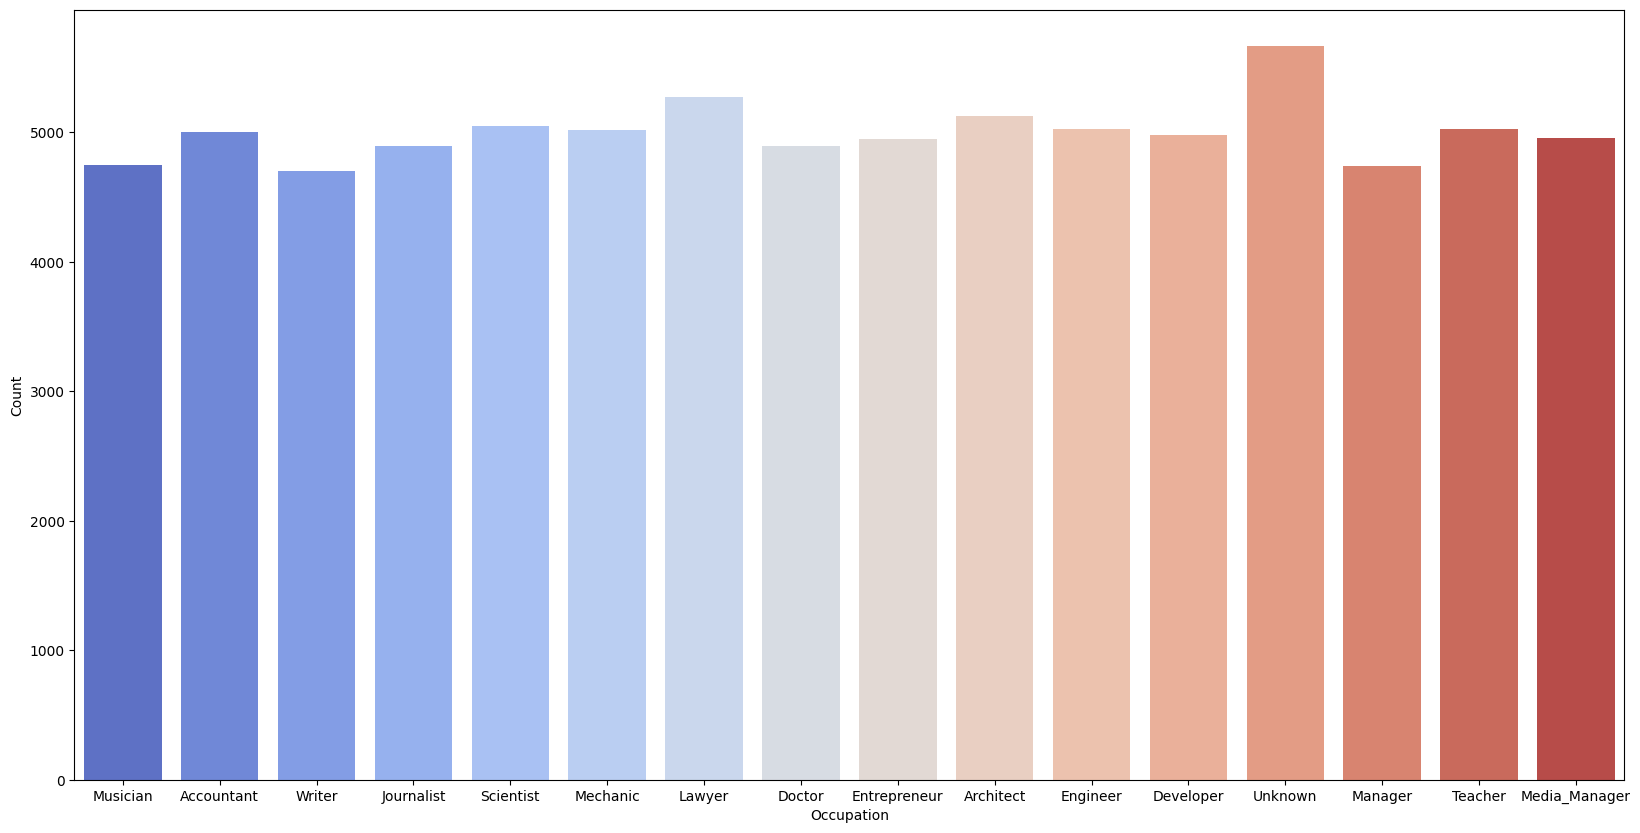

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=new_X_train['Occupation'],palette="coolwarm")

plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

#### occupation_encoded

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
new_X_train['Occupation'] = new_X_train['Occupation'].astype(str)
occupation_encoded = encoder.fit_transform(new_X_train[['Occupation']])


In [ ]:
occupation_encoded_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['Occupation']))
occupation_encoded_df.index = new_X_train.index
new_X_train = pd.concat([new_X_train, occupation_encoded_df], axis=1)
new_X_train.drop('Occupation', axis=1, inplace=True)

new_X_train.head()


,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
59428,CUS_0x3ec1,5,41.0,70154.85,5696.237500,8,5,18,814,"Auto Loan, and Personal Loan",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51959,CUS_0x4d8b,8,54.0,29508.41,NaN,7,4,9,1,Payday Loan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63188,CUS_0x3f89,5,19.0,31346.22,NaN,8,5,31,9,"Student Loan, Home Equity Loan, Auto Loan, Hom...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99613,CUS_0x2829,6,32.0,64901.37,5298.447500,3,5,20,0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57804,CUS_0x3b6e,5,32.0,7200.035,540.002917,8,8,18,3,"Home Equity Loan, Student Loan, and Payday Loan",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,12073
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,9109


##### replace unvalid values and convert Annual_Income into numeric

In [ ]:
new_X_train['Annual_Income']=replace_value('Annual_Income')
new_X_train['Annual_Income']

,Annual_Income
59428,70154.85
51959,29508.41
63188,31346.22
99613,64901.37
57804,7200.035
...,...
89460,44744.0
60620,17642.275
34086,45499.89
58067,17296.485


In [ ]:
new_X_train['Annual_Income']=pd.to_numeric(new_X_train['Annual_Income'],downcast='float')

#### 'Monthly_Inhand_Salary'

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Count'>

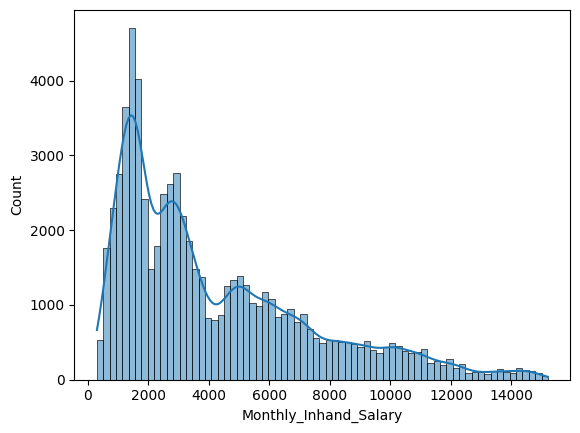

In [ ]:
sns.histplot(new_X_train['Monthly_Inhand_Salary'],kde=True)

#### Fill null values in 'Monthly_Inhand_Salary' column

In [ ]:
new_X_train['Monthly_Inhand_Salary'] = new_X_train['Monthly_Inhand_Salary'].fillna(new_X_train['Monthly_Inhand_Salary'].median())

In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,9109


####  Type_of_Loan

In [ ]:
new_X_train['Type_of_Loan'].unique()

array(['Auto Loan, and Personal Loan', 'Payday Loan',
       'Student Loan, Home Equity Loan, Auto Loan, Home Equity Loan, Debt Consolidation Loan, Personal Loan, Not Specified, Debt Consolidation Loan, and Not Specified',
       ...,
       'Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan',
       'Payday Loan, Credit-Builder Loan, Not Specified, and Payday Loan',
       'Not Specified, Mortgage Loan, Not Specified, Debt Consolidation Loan, Auto Loan, and Student Loan'],
      dtype=object)

In [ ]:
mode_loan = new_X_train['Type_of_Loan'].mode()[0]
new_X_train['Type_of_Loan'].fillna(mode_loan, inplace=True)

<ipython-input-189-74751cced234>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_X_train['Type_of_Loan'].fillna(mode_loan, inplace=True)


In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


#### Num_Credit_Inquiries column

In [ ]:
new_X_train['Num_Credit_Inquiries'].unique()

array([  0.,   4.,  12., ..., 376., 650., 632.])

In [ ]:
new_X_train['Num_Credit_Inquiries'] = new_X_train['Num_Credit_Inquiries'].fillna(new_X_train['Num_Credit_Inquiries'].median())

In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [ ]:
new_X_train['Num_Credit_Inquiries'] = pd.to_numeric(new_X_train['Num_Credit_Inquiries'], errors='coerce')

In [ ]:
train['Num_Credit_Inquiries'].dtype

dtype('float64')

#### Credit_History_Age column

In [ ]:
new_X_train['Credit_History_Age'].unique()

array(['21 Years and 0 Months', '19 Years and 9 Months',
       '8 Years and 11 Months', '31 Years and 3 Months',
       '14 Years and 2 Months', '25 Years and 1 Months', nan,
       '22 Years and 8 Months', '31 Years and 6 Months',
       '23 Years and 5 Months', '1 Years and 3 Months',
       '8 Years and 8 Months', '26 Years and 11 Months',
       '32 Years and 4 Months', '18 Years and 11 Months',
       '31 Years and 4 Months', '11 Years and 9 Months',
       '13 Years and 4 Months', '20 Years and 2 Months',
       '21 Years and 9 Months', '3 Years and 3 Months',
       '19 Years and 3 Months', '16 Years and 6 Months',
       '4 Years and 2 Months', '32 Years and 5 Months',
       '15 Years and 1 Months', '14 Years and 5 Months',
       '16 Years and 3 Months', '26 Years and 6 Months',
       '12 Years and 6 Months', '20 Years and 3 Months',
       '19 Years and 11 Months', '16 Years and 0 Months',
       '21 Years and 6 Months', '11 Years and 2 Months',
       '19 Years and 0 Mont

In [ ]:
def convert_to_years(value):
    if pd.isna(value):
        return np.nan
    parts = value.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_years = years + (months / 12)
    return round(total_years, 2)


In [ ]:
new_X_train['Credit_History_Age']= new_X_train['Credit_History_Age'].apply(convert_to_years)

In [ ]:
new_X_train['Credit_History_Age'].fillna(new_X_train['Credit_History_Age'].median(), inplace=True)

<ipython-input-199-f491646b2320>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_X_train['Credit_History_Age'].fillna(new_X_train['Credit_History_Age'].median(), inplace=True)


In [ ]:
new_X_train['Credit_History_Age'].unique()

array([21.  , 19.75,  8.92, 31.25, 14.17, 25.08, 18.25, 22.67, 31.5 ,
       23.42,  1.25,  8.67, 26.92, 32.33, 18.92, 31.33, 11.75, 13.33,
       20.17, 21.75,  3.25, 19.25, 16.5 ,  4.17, 32.42, 15.08, 14.42,
       16.25, 26.5 , 12.5 , 20.25, 19.92, 16.  , 21.5 , 11.17, 19.  ,
        9.25, 16.92,  9.33, 17.08, 21.17, 17.17, 12.83, 23.08,  2.67,
        4.83, 15.5 , 24.25, 31.83, 25.58,  7.92, 19.67, 18.5 , 24.17,
        9.92, 23.75, 20.67, 17.42, 24.  ,  6.17, 28.17, 20.5 , 18.  ,
       17.75, 30.58, 19.58, 21.42, 23.33, 32.25,  5.17, 18.58, 23.92,
       21.33, 15.42, 18.83, 13.08, 11.58, 18.75, 28.5 , 17.  ,  6.67,
       30.  , 13.42,  8.75, 26.17, 16.33, 25.92, 25.75, 14.92,  7.17,
       30.75, 19.83, 18.67, 29.08, 13.92,  5.92, 30.33, 17.33, 18.17,
       31.08, 11.25, 27.33, 23.  , 16.42, 26.42, 27.5 , 15.83,  0.58,
       31.  , 16.17, 21.92, 10.83, 17.25, 25.17, 14.83,  8.  , 27.25,
        6.58, 10.33, 11.92, 30.5 , 29.92, 13.83,  7.33, 18.33, 30.08,
        6.5 ,  9.  ,

In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


#### Amount_invested_monthly column

In [ ]:
new_X_train['Amount_invested_monthly'].unique()

array(['87.63253757974445', '32.35159606871025', '82.92423393046731', ...,
       '168.51135012674533', '142.9688813982085', '314.4822747494407'],
      dtype=object)

In [ ]:
new_X_train['Amount_invested_monthly'].dtype

dtype('O')

In [ ]:
new_X_train['Amount_invested_monthly'] = pd.to_numeric(new_X_train['Amount_invested_monthly'], errors='coerce')

In [ ]:
new_X_train['Amount_invested_monthly']=new_X_train['Amount_invested_monthly'].fillna(new_X_train['Amount_invested_monthly'].median())

In [ ]:
new_X_train['Amount_invested_monthly'].dtype

dtype('float64')

In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


#### Monthly_Balance column

In [ ]:
new_X_train['Monthly_Balance'].unique()

array(['629.1029424808312', '448.70460839846544', '238.96913003409344',
       ..., '385.05369627150253', '304.00568179342656',
       '763.6889376518986'], dtype=object)

In [ ]:
new_X_train['Monthly_Balance'].dtype


dtype('O')

In [ ]:
new_X_train['Monthly_Balance'] = pd.to_numeric(new_X_train['Monthly_Balance'], errors='coerce')

In [ ]:
new_X_train['Monthly_Balance'].dtype

dtype('float64')

In [ ]:
new_X_train['Monthly_Balance']=new_X_train['Monthly_Balance'].fillna(new_X_train['Monthly_Balance'].median())

In [ ]:
new_X_train.isna().sum()

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


### Finalaly💯🥳:,No Missing Values in the whole dataset

In [ ]:
new_X_train=new_X_train.drop('Customer_ID',axis=1)
new_X_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
59428,5,41.0,70154.850,5696.237500,8,5,18,814,"Auto Loan, and Personal Loan",27,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51959,8,54.0,29508.410,3089.424167,7,4,9,1,Payday Loan,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63188,5,19.0,31346.220,3089.424167,8,5,31,9,"Student Loan, Home Equity Loan, Auto Loan, Hom...",44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99613,6,32.0,64901.370,5298.447500,3,5,20,0,Not Specified,15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57804,5,32.0,7200.035,540.002917,8,8,18,3,"Home Equity Loan, Student Loan, and Payday Loan",60,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 59428 to 92975
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  int64  
 1   Age                       80000 non-null  float64
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  int64  
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  object 
 8   Type_of_Loan              80000 non-null  object 
 9   Delay_from_due_date       80000 non-null  int64  
 10  Num_of_Delayed_Payment    80000 non-null  object 
 11  Changed_Credit_Limit      80000 non-null  object 
 12  Num_Credit_Inquiries      80000 non-null  float64
 13  Credit_Mix                80000 non-null  object 
 14  Outstan

#### Encoding Payment_of_Min_Amount

In [ ]:
new_X_train['Payment_of_Min_Amount'].unique()

array(['Yes', 'No', 'NM'], dtype=object)

In [ ]:
new_X_train['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,41781
No,28525
NM,9694


In [ ]:
new_X_train['Payment_of_Min_Amount'] = new_X_train['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})

<ipython-input-218-bc1a37b543e6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_X_train['Payment_of_Min_Amount'] = new_X_train['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})


In [ ]:
new_X_train['Payment_of_Min_Amount'].unique()

array([1, 0, 2])

In [ ]:
new_X_train['Payment_of_Min_Amount'].dtype

dtype('int64')

##### Encoding Payment_Behaviour

In [ ]:
new_X_train['Payment_Behaviour'].unique()

array(['High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments', '!@9#%8'], dtype=object)

In [ ]:
new_X_train['Payment_Behaviour']=new_X_train['Payment_Behaviour'].replace('!@9#%8','unknown')

In [ ]:
mode_value = new_X_train['Payment_Behaviour'].mode()[0]
new_X_train['Payment_Behaviour']=new_X_train['Payment_Behaviour'].replace("unknown", mode_value)

In [ ]:
new_X_train['Payment_Behaviour'].unique()

array(['High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

<Axes: xlabel='Payment_Behaviour', ylabel='count'>

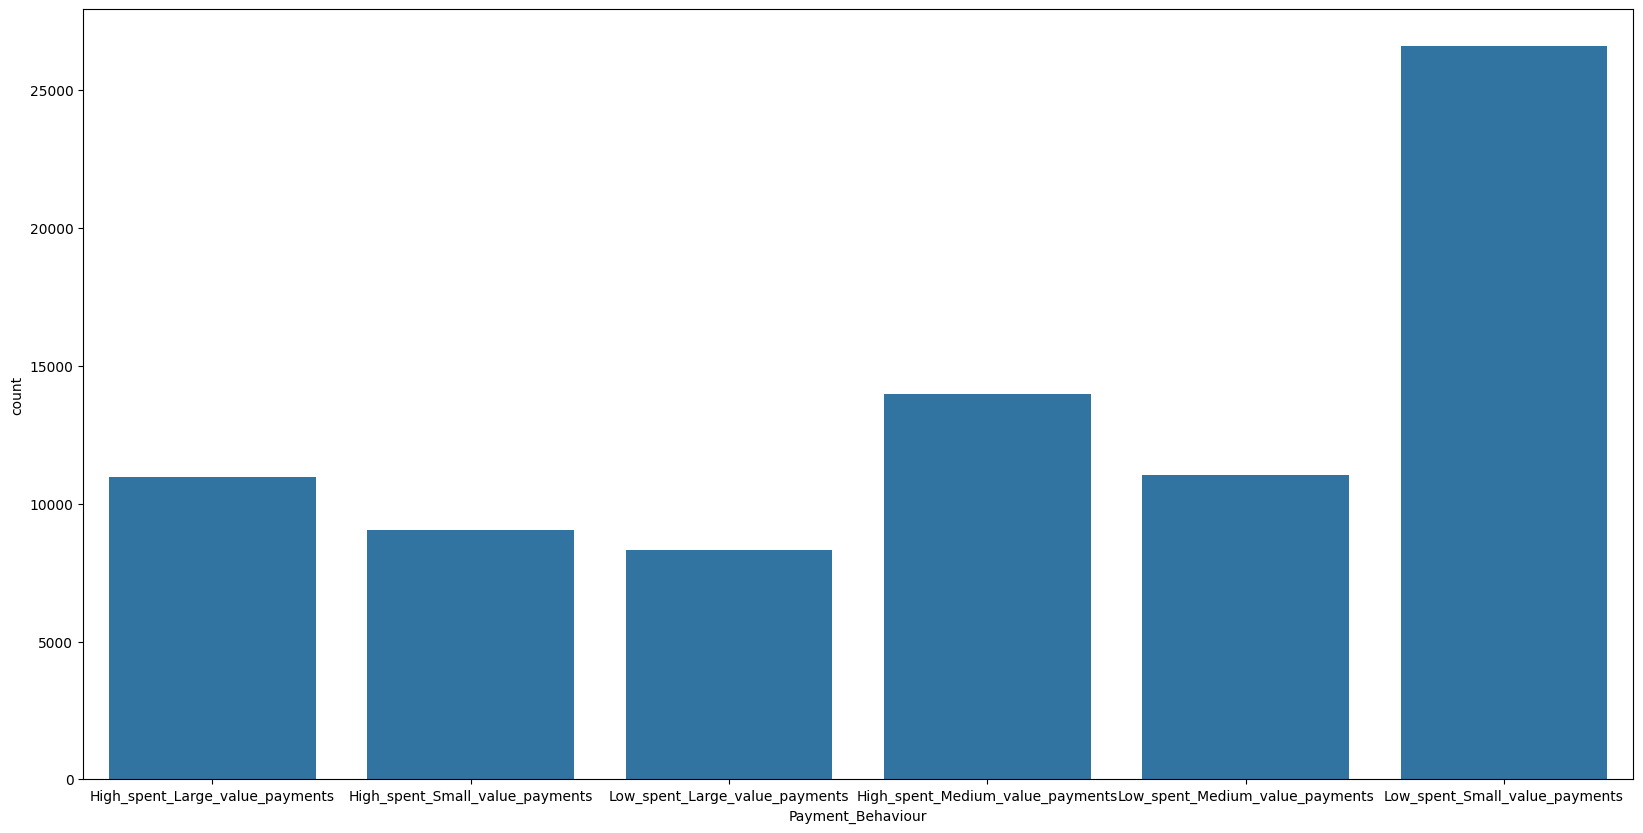

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=new_X_train['Payment_Behaviour'])

- :Insight:

The most frequent Payment Behaviour is Low_spent_Small_value_payments

In [ ]:
encoder_ord = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments']])
new_X_train['Payment_Behaviour'] = encoder_ord.fit_transform(new_X_train[['Payment_Behaviour']])

In [ ]:
new_X_train['Payment_Behaviour'].unique()

array([4., 0., 1., 3., 5., 2.])

In [ ]:
new_X_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
59428,5,41.0,70154.850,5696.237500,8,5,18,814,"Auto Loan, and Personal Loan",27,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51959,8,54.0,29508.410,3089.424167,7,4,9,1,Payday Loan,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63188,5,19.0,31346.220,3089.424167,8,5,31,9,"Student Loan, Home Equity Loan, Auto Loan, Hom...",44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99613,6,32.0,64901.370,5298.447500,3,5,20,0,Not Specified,15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57804,5,32.0,7200.035,540.002917,8,8,18,3,"Home Equity Loan, Student Loan, and Payday Loan",60,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
new_X_train=new_X_train.drop(['Type_of_Loan'],axis=1)

In [ ]:
new_X_train.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
59428,5,41.0,70154.850,5696.237500,8,5,18,814,27,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
51959,8,54.0,29508.410,3089.424167,7,4,9,1,18,nan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63188,5,19.0,31346.220,3089.424167,8,5,31,9,44,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99613,6,32.0,64901.370,5298.447500,3,5,20,0,15,nan,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57804,5,32.0,7200.035,540.002917,8,8,18,3,60,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##### Check if data is ok ,all values is numeric  and no missing values

In [ ]:
new_X_train.isna().sum()

,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0


In [ ]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 59428 to 92975
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  int64  
 1   Age                       80000 non-null  float64
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  int64  
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  object 
 8   Delay_from_due_date       80000 non-null  int64  
 9   Num_of_Delayed_Payment    80000 non-null  object 
 10  Changed_Credit_Limit      80000 non-null  object 
 11  Num_Credit_Inquiries      80000 non-null  float64
 12  Credit_Mix                80000 non-null  object 
 13  Outstanding_Debt          80000 non-null  object 
 14  Credit_

In [ ]:
new_X_train['Outstanding_Debt'].unique()

array(['487.42', '333.86', '1795.98', ..., '2589.63_', '1773.45_',
       '1434.75_'], dtype=object)

In [ ]:
new_X_train['Outstanding_Debt'] = new_X_train['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
new_X_train['Outstanding_Debt'] = pd.to_numeric(new_X_train['Outstanding_Debt'], errors='coerce')

In [ ]:
new_X_train['Num_of_Delayed_Payment'] = new_X_train['Num_of_Delayed_Payment'].astype(float)
new_X_train['Num_of_Delayed_Payment'] = new_X_train['Num_of_Delayed_Payment'].fillna(new_X_train['Num_of_Delayed_Payment'].median())

In [ ]:
new_X_train['Changed_Credit_Limit'] = new_X_train['Changed_Credit_Limit'].str.replace('_', '')
new_X_train['Changed_Credit_Limit'] = pd.to_numeric(new_X_train['Changed_Credit_Limit'], errors='coerce')
new_X_train['Changed_Credit_Limit'] = new_X_train['Changed_Credit_Limit'].fillna(new_X_train['Changed_Credit_Limit'].median())

In [ ]:
new_X_train['Num_of_Loan'] = new_X_train['Num_of_Loan'].str.replace('[^\d.]', '', regex=True)
new_X_train['Num_of_Loan'] = pd.to_numeric(new_X_train['Num_of_Loan'], errors='coerce')

In [ ]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 59428 to 92975
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  int64  
 1   Age                       80000 non-null  float64
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  int64  
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  int64  
 8   Delay_from_due_date       80000 non-null  int64  
 9   Num_of_Delayed_Payment    80000 non-null  float64
 10  Changed_Credit_Limit      80000 non-null  float64
 11  Num_Credit_Inquiries      80000 non-null  float64
 12  Credit_Mix                80000 non-null  object 
 13  Outstanding_Debt          80000 non-null  float64
 14  Credit_

In [ ]:
new_X_train['Credit_Mix'].unique()

array(['Standard', '_', 'Good', 'Bad'], dtype=object)

In [ ]:
mode_value = new_X_train['Credit_Mix'].mode()[0]
new_X_train['Credit_Mix']=new_X_train['Credit_Mix'].replace("_", mode_value)

In [ ]:
new_X_train['Credit_Mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [ ]:
encoder_ord_mix = OrdinalEncoder(categories=[['Standard', 'Good', 'Bad']])
new_X_train['Credit_Mix'] = encoder_ord_mix.fit_transform(new_X_train[['Credit_Mix']])

In [ ]:
new_X_train['Credit_Mix']

,Credit_Mix
59428,0.0
51959,0.0
63188,0.0
99613,0.0
57804,0.0
...,...
89460,0.0
60620,1.0
34086,2.0
58067,1.0


## Credit_Score Column (the target)

In [ ]:
y.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
score_encoder = LabelEncoder()

y_encoded = score_encoder.fit_transform(y )



In [ ]:
y_encoded

array([0, 0, 0, ..., 1, 2, 1])

In [ ]:
new_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 59428 to 92975
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     80000 non-null  int64  
 1   Age                       80000 non-null  float64
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  int64  
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  int64  
 8   Delay_from_due_date       80000 non-null  int64  
 9   Num_of_Delayed_Payment    80000 non-null  float64
 10  Changed_Credit_Limit      80000 non-null  float64
 11  Num_Credit_Inquiries      80000 non-null  float64
 12  Credit_Mix                80000 non-null  float64
 13  Outstanding_Debt          80000 non-null  float64
 14  Credit_

#### Finally ,all columns in data is good

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [ ]:
# scaler = StandardScaler()
scaler =RobustScaler()
scaled_data=scaler.fit_transform(new_X_train)
scaled_data

array([[ 0.25      ,  0.5       ,  0.61365668, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.3125    , -0.14983755, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25      , -0.875     , -0.11531651, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.75      , -0.5625    ,  0.15054307, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.6875    , -0.37922379, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.3125    ,  1.41569393, ...,  0.        ,
         1.        ,  0.        ]])

#### Now,
data is scaled to pass into the model

----------------------

# `05` Logistic Regression

Using `sklearn` implementation of logistic regression to model the data.

Hint: Look for `sklearn.linear_model.LogisticRegression` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- `random_state` $= 1234$

In [ ]:
log_Regr = LogisticRegression()
log_Regr.fit(scaled_data, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

#### Now,  combine all steps in one function for X_vaild dataset

In [ ]:
X_valid.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
93057,0x23743,CUS_0xc641,February,Matt Scuffhamo,24,864-79-3572,Mechanic,18065.0,1614.416667,10,...,10.0,_,2580.19,29.820169,19 Years and 6 Months,Yes,119.725972,__10000__,Low_spent_Medium_value_payments,163.91217588953884
8988,0x4aaa,CUS_0xb85a,May,NaN,42,991-95-5524,Accountant,56370.98,4973.581667,4,...,3.0,Good,726.6,28.612847,18 Years and 0 Months,No,180.810295,59.51391755846764,!@9#%8,497.03395427583337
75135,0x1ce3d,CUS_0xab9e,August,Kaustubh Kulkarnim,20_,228-35-6058,_______,50513.12,4239.426667,7,...,4.0,Good,456.26,28.149438,NaN,No,72.745057,374.8265357137044,Low_spent_Medium_value_payments,256.37107393366176
77156,0x1da16,CUS_0x27d5,May,NaN,44,524-83-1898,Developer,34872.34,2751.028333,5,...,3.0,Standard,1375.96,30.036345,30 Years and 7 Months,No,32.563998,136.54788637556712,High_spent_Small_value_payments,365.9909487611932
87234,0x21524,CUS_0x9903,March,Patricku,20,015-52-4404,Manager,109981.6,NaN,4,...,4.0,_,873.07,42.157968,26 Years and 0 Months,No,25283.000000,97.90948723179213,High_spent_Large_value_payments,714.0133319824517


In [ ]:
X_valid.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,1424
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,2031
Num_Bank_Accounts,0


In [ ]:

missing_percentage_vaild = (X_valid.isna().sum() / len(X_valid)) * 100
missing_percentage_vaild


,0
ID,0.000000
Customer_ID,0.000000
Month,0.000000
Name,10.171429
Age,0.000000
SSN,0.000000
Occupation,0.000000
Annual_Income,0.000000
Monthly_Inhand_Salary,14.507143
Num_Bank_Accounts,0.000000


In [ ]:
X_valid.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
93057,0x23743,CUS_0xc641,February,Matt Scuffhamo,24,864-79-3572,Mechanic,18065.0,1614.416667,10,...,10.0,_,2580.19,29.820169,19 Years and 6 Months,Yes,119.725972,__10000__,Low_spent_Medium_value_payments,163.91217588953884
8988,0x4aaa,CUS_0xb85a,May,NaN,42,991-95-5524,Accountant,56370.98,4973.581667,4,...,3.0,Good,726.6,28.612847,18 Years and 0 Months,No,180.810295,59.51391755846764,!@9#%8,497.03395427583337
75135,0x1ce3d,CUS_0xab9e,August,Kaustubh Kulkarnim,20_,228-35-6058,_______,50513.12,4239.426667,7,...,4.0,Good,456.26,28.149438,NaN,No,72.745057,374.8265357137044,Low_spent_Medium_value_payments,256.37107393366176
77156,0x1da16,CUS_0x27d5,May,NaN,44,524-83-1898,Developer,34872.34,2751.028333,5,...,3.0,Standard,1375.96,30.036345,30 Years and 7 Months,No,32.563998,136.54788637556712,High_spent_Small_value_payments,365.9909487611932
87234,0x21524,CUS_0x9903,March,Patricku,20,015-52-4404,Manager,109981.6,NaN,4,...,4.0,_,873.07,42.157968,26 Years and 0 Months,No,25283.000000,97.90948723179213,High_spent_Large_value_payments,714.0133319824517


In [ ]:

X_valid['Num_of_Delayed_Payment'] = X_valid['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')

X_valid['Num_of_Delayed_Payment'].unique()

X_valid=X_valid.drop(columns=['ID','SSN','Name'],axis=1)

X_valid.head()

X_valid.isna().sum()


,0
Customer_ID,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,2031
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0


In [ ]:

#### clean age column

def replace_value(col):
    train[col] = train[col].astype(str).str.replace('_', '')
    train[col] = train[col].astype(str).str.replace('-', '')
    return train[col]

X_valid['Age']=replace_value('Age')
X_valid['Age']

#### convert Age column into numeric

X_valid['Age']=pd.to_numeric(X_valid['Age'],downcast='float')

X_valid['Age'].unique()

X_valid['Age'].dtype

X_valid['Age']=pd.to_numeric(X_valid['Age'],downcast='float')

X_valid['Age'].dtype

X_valid.isna().sum()

median_age = X_valid['Age'].median()
X_valid['Age'] = X_valid['Age'].apply(lambda x: median_age if x > 100 else x)

X_valid.head()


month_encoding = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}

X_valid['Month'] = X_valid['Month'].map(month_encoding)

X_valid.head()


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
93057,CUS_0xc641,2,24.0,Mechanic,18065.0,1614.416667,10,9,28,9,...,10.0,_,2580.19,29.820169,19 Years and 6 Months,Yes,119.725972,__10000__,Low_spent_Medium_value_payments,163.91217588953884
8988,CUS_0xb85a,5,42.0,Accountant,56370.98,4973.581667,4,6,3,4,...,3.0,Good,726.6,28.612847,18 Years and 0 Months,No,180.810295,59.51391755846764,!@9#%8,497.03395427583337
75135,CUS_0xab9e,8,20.0,_______,50513.12,4239.426667,7,6,10,2,...,4.0,Good,456.26,28.149438,NaN,No,72.745057,374.8265357137044,Low_spent_Medium_value_payments,256.37107393366176
77156,CUS_0x27d5,5,44.0,Developer,34872.34,2751.028333,5,4,6,2,...,3.0,Standard,1375.96,30.036345,30 Years and 7 Months,No,32.563998,136.54788637556712,High_spent_Small_value_payments,365.9909487611932
87234,CUS_0x9903,3,20.0,Manager,109981.6,NaN,4,4,11,4,...,4.0,_,873.07,42.157968,26 Years and 0 Months,No,25283.000000,97.90948723179213,High_spent_Large_value_payments,714.0133319824517


In [ ]:

####  Occupation column

X_valid['Occupation'].unique()

X_valid['Occupation'].value_counts()

X_valid['Occupation'] = X_valid['Occupation'].replace("_______", "Unknown")

X_valid['Occupation'].unique()


array(['Mechanic', 'Accountant', 'Unknown', 'Developer', 'Manager',
       'Lawyer', 'Doctor', 'Entrepreneur', 'Writer', 'Media_Manager',
       'Teacher', 'Journalist', 'Musician', 'Architect', 'Scientist',
       'Engineer'], dtype=object)

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_occupation = encoder.fit_transform(X_valid[['Occupation']])

occupation_encoded_df = pd.DataFrame(
    encoded_occupation.toarray(),
    columns=encoder.get_feature_names_out(['Occupation']),
    index=X_valid.index
)

In [ ]:
occupation_encoded_df.index = X_valid.index
X_valid = pd.concat([X_valid, occupation_encoded_df], axis=1)

In [ ]:
X_valid_proc=X_valid.drop('Occupation',axis=1)

In [ ]:
X_valid_proc.head()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
93057,CUS_0xc641,2,24.0,18065.0,1614.416667,10,9,28,9,"Debt Consolidation Loan, Personal Loan, Payday...",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8988,CUS_0xb85a,5,42.0,56370.98,4973.581667,4,6,3,4,"Auto Loan, Debt Consolidation Loan, Personal L...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75135,CUS_0xab9e,8,20.0,50513.12,4239.426667,7,6,10,2,"Payday Loan, and Debt Consolidation Loan",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
77156,CUS_0x27d5,5,44.0,34872.34,2751.028333,5,4,6,2,"Student Loan, and Payday Loan",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87234,CUS_0x9903,3,20.0,109981.6,NaN,4,4,11,4,"Auto Loan, Credit-Builder Loan, Payday Loan, a...",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

##### replace unvalid values and convert Annual_Income into numeric

X_valid_proc['Annual_Income']=replace_value('Annual_Income')
X_valid_proc['Annual_Income']

X_valid_proc['Annual_Income']=pd.to_numeric(X_valid_proc['Annual_Income'],downcast='float')


#### Fill null values in 'Monthly_Inhand_Salary' column

X_valid_proc['Monthly_Inhand_Salary'] = X_valid_proc['Monthly_Inhand_Salary'].fillna(X_valid_proc['Monthly_Inhand_Salary'].median())

X_valid_proc.isna().sum()

####  Type_of_Loan

X_valid_proc['Type_of_Loan'].unique()

mode_loan = X_valid_proc['Type_of_Loan'].mode()[0]
X_valid_proc['Type_of_Loan'].fillna(mode_loan, inplace=True)

X_valid_proc.isna().sum()

#### Num_Credit_Inquiries column

X_valid_proc['Num_Credit_Inquiries'].unique()

X_valid_proc['Num_Credit_Inquiries'] = X_valid_proc['Num_Credit_Inquiries'].fillna(X_valid_proc['Num_Credit_Inquiries'].median())

X_valid_proc.isna().sum()

X_valid_proc['Num_Credit_Inquiries'] = pd.to_numeric(X_valid_proc['Num_Credit_Inquiries'], errors='coerce')

X_valid_proc['Num_Credit_Inquiries'].dtype

#### Credit_History_Age column

X_valid_proc['Credit_History_Age'].unique()

def convert_to_years(value):
    if pd.isna(value):
        return np.nan
    parts = value.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_years = years + (months / 12)
    return round(total_years, 2)


X_valid_proc['Credit_History_Age']= X_valid_proc['Credit_History_Age'].apply(convert_to_years)

X_valid_proc['Credit_History_Age'].fillna(X_valid_proc['Credit_History_Age'].median(), inplace=True)

X_valid_proc['Credit_History_Age'].unique()

X_valid_proc.isna().sum()

#### Amount_invested_monthly column

X_valid_proc['Amount_invested_monthly'].unique()

X_valid_proc['Amount_invested_monthly'].dtype

X_valid_proc['Amount_invested_monthly'] = pd.to_numeric(X_valid_proc['Amount_invested_monthly'], errors='coerce')

X_valid_proc['Amount_invested_monthly']=X_valid_proc['Amount_invested_monthly'].fillna(X_valid_proc['Amount_invested_monthly'].median())

X_valid_proc['Amount_invested_monthly'].dtype

X_valid_proc.isna().sum()

#### Monthly_Balance column

X_valid_proc['Monthly_Balance'].unique()

X_valid_proc['Monthly_Balance'].dtype


X_valid_proc['Monthly_Balance'] = pd.to_numeric(X_valid['Monthly_Balance'], errors='coerce')

X_valid_proc['Monthly_Balance'].dtype

X_valid_proc['Monthly_Balance']=X_valid_proc['Monthly_Balance'].fillna(X_valid_proc['Monthly_Balance'].median())

X_valid_proc.isna().sum()


<ipython-input-262-ec5acc603fb8>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_valid_proc['Type_of_Loan'].fillna(mode_loan, inplace=True)
<ipython-input-262-ec5acc603fb8>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [ ]:
X_valid_proc=X_valid_proc.drop('Customer_ID',axis=1)
X_valid_proc.head()

X_valid_proc.info()

#### Encoding Payment_of_Min_Amount

X_valid_proc['Payment_of_Min_Amount'].unique()

X_valid_proc['Payment_of_Min_Amount'].value_counts()

X_valid_proc['Payment_of_Min_Amount'] = X_valid_proc['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})

X_valid_proc['Payment_of_Min_Amount'].unique()

X_valid_proc['Payment_of_Min_Amount'].dtype

##### Encoding Payment_Behaviour

X_valid_proc['Payment_Behaviour'].unique()

X_valid_proc['Payment_Behaviour']=X_valid_proc['Payment_Behaviour'].replace('!@9#%8','unknown')

mode_value = X_valid_proc['Payment_Behaviour'].mode()[0]
X_valid_proc['Payment_Behaviour']=X_valid_proc['Payment_Behaviour'].replace("unknown", mode_value)

X_valid_proc['Payment_Behaviour'].unique()



encoder_ord = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments']])
X_valid_proc['Payment_Behaviour'] = encoder_ord.fit_transform(X_valid_proc[['Payment_Behaviour']])



<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 93057 to 665
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     14000 non-null  int64  
 1   Age                       14000 non-null  float64
 2   Annual_Income             14000 non-null  float64
 3   Monthly_Inhand_Salary     14000 non-null  float64
 4   Num_Bank_Accounts         14000 non-null  int64  
 5   Num_Credit_Card           14000 non-null  int64  
 6   Interest_Rate             14000 non-null  int64  
 7   Num_of_Loan               14000 non-null  object 
 8   Type_of_Loan              14000 non-null  object 
 9   Delay_from_due_date       14000 non-null  int64  
 10  Num_of_Delayed_Payment    14000 non-null  object 
 11  Changed_Credit_Limit      14000 non-null  object 
 12  Num_Credit_Inquiries      14000 non-null  float64
 13  Credit_Mix                14000 non-null  object 
 14  Outstandi

<ipython-input-263-8bbb3ec16575>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_valid_proc['Payment_of_Min_Amount'] = X_valid_proc['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})


In [ ]:

X_valid_proc=X_valid_proc.drop(['Type_of_Loan'],axis=1)

X_valid_proc.head()

##### Check if data is ok ,all values is numeric  and no missing values

X_valid_proc.isna().sum()

X_valid_proc.info()

X_valid_proc['Outstanding_Debt'].unique()

X_valid_proc['Outstanding_Debt'] = X_valid_proc['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
X_valid_proc['Outstanding_Debt'] = pd.to_numeric(X_valid_proc['Outstanding_Debt'], errors='coerce')

X_valid_proc['Num_of_Delayed_Payment'] = X_valid_proc['Num_of_Delayed_Payment'].astype(float)
X_valid_proc['Num_of_Delayed_Payment'] = X_valid_proc['Num_of_Delayed_Payment'].fillna(X_valid_proc['Num_of_Delayed_Payment'].median())

X_valid_proc['Changed_Credit_Limit'] = X_valid_proc['Changed_Credit_Limit'].str.replace('_', '')
X_valid_proc['Changed_Credit_Limit'] = pd.to_numeric(X_valid_proc['Changed_Credit_Limit'], errors='coerce')
X_valid_proc['Changed_Credit_Limit'] = X_valid_proc['Changed_Credit_Limit'].fillna(X_valid_proc['Changed_Credit_Limit'].median())

X_valid_proc['Num_of_Loan'] = X_valid_proc['Num_of_Loan'].str.replace('[^\d.]', '', regex=True)
X_valid_proc['Num_of_Loan'] = pd.to_numeric(X_valid_proc['Num_of_Loan'], errors='coerce')

X_valid_proc.info()

X_valid_proc['Credit_Mix'].unique()

mode_value = X_valid_proc['Credit_Mix'].mode()[0]
X_valid_proc['Credit_Mix']=X_valid_proc['Credit_Mix'].replace("_", mode_value)

X_valid_proc['Credit_Mix'].unique()

encoder_ord_mix = OrdinalEncoder(categories=[['Standard', 'Good', 'Bad']])
X_valid_proc['Credit_Mix'] = encoder_ord_mix.fit_transform(X_valid_proc[['Credit_Mix']])

X_valid_proc['Credit_Mix']


<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 93057 to 665
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     14000 non-null  int64  
 1   Age                       14000 non-null  float64
 2   Annual_Income             14000 non-null  float64
 3   Monthly_Inhand_Salary     14000 non-null  float64
 4   Num_Bank_Accounts         14000 non-null  int64  
 5   Num_Credit_Card           14000 non-null  int64  
 6   Interest_Rate             14000 non-null  int64  
 7   Num_of_Loan               14000 non-null  object 
 8   Delay_from_due_date       14000 non-null  int64  
 9   Num_of_Delayed_Payment    14000 non-null  object 
 10  Changed_Credit_Limit      14000 non-null  object 
 11  Num_Credit_Inquiries      14000 non-null  float64
 12  Credit_Mix                14000 non-null  object 
 13  Outstanding_Debt          14000 non-null  object 
 14  Credit_Ut

,Credit_Mix
93057,0.0
8988,1.0
75135,1.0
77156,0.0
87234,0.0
...,...
60618,0.0
97943,1.0
87208,0.0
19079,1.0


In [ ]:

## Credit_Score Column (the target)

y.unique()

score_encoder = LabelEncoder()

y_encoded = score_encoder.fit_transform(y )

y_encoded


array([0, 0, 0, ..., 1, 2, 1])

In [ ]:
# scaler = StandardScaler()
scaler =RobustScaler()
scaled_data_vaild=scaler.fit_transform(X_valid_proc)
scaled_data_vaild

array([[-0.75      , -0.625     , -0.37482453, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.5       ,  0.33390223, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75      , -0.875     ,  0.22552171, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.        , -0.6875    ,  0.78054982, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75      , -0.8125    , -0.15570119, ...,  0.        ,
         0.        ,  0.        ],
       [-0.75      ,  0.125     ,  1.78827226, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
predictions_vaild = log_Regr.predict(scaled_data_vaild)

In [ ]:
predictions_vaild

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Good',
       'Standard'], dtype=object)

In [ ]:
log_Regr.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
print(classification_report(y_valid, predictions_vaild))

              precision    recall  f1-score   support

        Good       0.51      0.39      0.44      2531
        Poor       0.62      0.42      0.50      3997
    Standard       0.61      0.77      0.68      7472

    accuracy                           0.60     14000
   macro avg       0.58      0.53      0.54     14000
weighted avg       0.60      0.60      0.59     14000



:-**The accuarecy of this model is 60%**

## `iii` Regularization Mode: On

Let's try the default $l_2$ regularization. Use default $C$ parameter for simplicity. Does regularization make the model generalize better?

`Bonus:` You can use `solver='saga'` parameter to be able to try the $l_1$ regularization and compare the two.

In [ ]:
model_saga = LogisticRegression(penalty='l2', solver='saga', random_state=42)
model_saga.fit(scaled_data, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='saga')

In [ ]:
pred_l2 = model_saga.predict(scaled_data_vaild)

In [ ]:
print("Regularization L2 with solver saga result :\n ", classification_report(y_valid, pred_l2))

Regularization L2 with solver saga result :
                precision    recall  f1-score   support

        Good       0.51      0.27      0.36      2531
        Poor       0.62      0.43      0.51      3997
    Standard       0.60      0.80      0.69      7472

    accuracy                           0.60     14000
   macro avg       0.58      0.50      0.52     14000
weighted avg       0.59      0.60      0.57     14000



-the accurecy is 60%

##### with l1 regulaization

In [ ]:
model_saga_2 = LogisticRegression(penalty='l1', solver='saga', random_state=42)
model_saga_2.fit(scaled_data, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [ ]:
pred_l1 = model_saga_2.predict(scaled_data_vaild)

In [ ]:
print("Regularization L1 with solver saga result :\n ", classification_report(y_valid, pred_l1))

Regularization L1 with solver saga result :
                precision    recall  f1-score   support

        Good       0.51      0.27      0.36      2531
        Poor       0.62      0.43      0.51      3997
    Standard       0.60      0.80      0.69      7472

    accuracy                           0.60     14000
   macro avg       0.58      0.50      0.52     14000
weighted avg       0.59      0.60      0.57     14000



- the accuarecy is 60%

## `iv` Tuning Hyperparameters

1. Try different `C` values and evaluate. What is the best panalty value?
2. Try training the model while using the `class_weight` parameter and compare the results. Did it affect the model evaluation?
3. You can tune other parameters as you see fit (but make sure you elaborate your reasoning).

`Note:` Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [ ]:
sgd_clf = SGDClassifier(alpha= 0.0001)
sgd_clf.fit(scaled_data, y_train)

SGDClassifier()

In [ ]:
pred_sgd = sgd_clf.predict(scaled_data_vaild)

In [ ]:
print("SGD result :\n ", classification_report(y_valid, pred_sgd))

SGD result :
                precision    recall  f1-score   support

        Good       0.43      0.33      0.37      2531
        Poor       0.53      0.41      0.46      3997
    Standard       0.60      0.73      0.66      7472

    accuracy                           0.56     14000
   macro avg       0.52      0.49      0.50     14000
weighted avg       0.55      0.56      0.55     14000



- the accuracy is 56% with base SGD

In [ ]:
params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'class_weight': ["balanced", None],
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal'],
}

I already run this cell for grid search many times so it have a lot of time and this is output I have in each time.

In [ ]:
clf = GridSearchCV(sgd_clf, params, cv=3, verbose=5, n_jobs=-1)
clf.fit(scaled_data, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits

In [ ]:
clf.best_params_

{'alpha': 1,
 'class_weight': 'balanced',
 'eta0': 1,
 'learning_rate': 'optimal',
 'penalty': 'l2'}

In [ ]:
clf.best_score_

0.6123000662859224

In [ ]:
best_model = clf.best_estimator_
y_pred = best_model.predict(scaled_data_vaild)

In [ ]:
classification_report(y_valid, y_pred)

      accuracy                           0.60    

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", np.round(accuracy,2))

- The accuarcy is 60%

-----------------------------

# `06` Logistic Regression with Gradient Descent

The `LogisticRegression` class optimizes the model paramters via solvers (e.g., `lbfgs`, `saga`, etc.) instead of using gradient descent.

If we want to train the logistic regression model using gradient descent we can use `SGDClassifier` and tune the parameters almost the same way we did with `SGDRegressor`.

Try this and do hyperparameter tuning if needed to decide which model is better.

`Notes:`
- You will have to set `loss='log_loss'` to use `SGDClassifier` as a logistic regression model.
- The `alpha` parameter is the inverse of the `C` parameter and hence bigger values will result in more regularization.



In [ ]:
sgd_clf = SGDClassifier(loss='log_loss',alpha=0.01)
sgd_clf.fit(scaled_data, y_train)

SGDClassifier(alpha=0.01, loss='log_loss')

In [ ]:
pred = sgd_clf.predict(scaled_data_vaild)

In [ ]:
classification_report(y_valid, pred)

'              precision    recall  f1-score   support\n\n        Good       0.50      0.22      0.31      2531\n        Poor       0.61      0.42      0.50      3997\n    Standard       0.59      0.80      0.68      7472\n\n    accuracy                           0.59     14000\n   macro avg       0.57      0.48      0.50     14000\nweighted avg       0.58      0.59      0.56     14000\n'

In [ ]:
accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", np.round(accuracy,2))

Accuracy: 0.59


- The  accuracy is 59%

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
X_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
41166,0x10734,CUS_0xbfea,July,NaN,45,531-40-7694,Scientist,44258.1,3867.175000,2,...,3.0,Good,345.23,29.170329,32 Years and 5 Months,No,23.661054,64.43251669483482,High_spent_Medium_value_payments,548.6239288538757
24337,0xa49b,CUS_0x26d4,February,Caroline Valetkevitchj,38,331-38-2680,Lawyer,9493.125,662.093750,8,...,8.0,Bad,1558.02,31.895344,10 Years and 10 Months,Yes,26.817504,64.3325234747512,Low_spent_Small_value_payments,265.05934758365396
5431,0x35d1,CUS_0xa445,August,Baileyh,41,075-29-9342,Journalist,8406.375,944.531250,9,...,11.0,Bad,1853.17,36.504754,17 Years and 8 Months,Yes,44.005211,63.532248119730866,Low_spent_Large_value_payments,256.9156659637989
87506,0x216bc,CUS_0xafc3,March,Alister Bullv,23,270-73-7020,Developer,14901.88,1362.823333,7,...,3.0,Standard,932.33,33.534582,19 Years and 4 Months,No,7.293280,__10000__,Low_spent_Medium_value_payments,350.7801254709064
49976,0x13ad6,CUS_0x9684,January,Pa,38,169-39-0733,Developer,15108.07,1098.005833,6,...,12.0,Bad,3650.33,28.884339,NaN,Yes,51.178969,145.03381279627638,Low_spent_Small_value_payments,203.5878016272962


In [ ]:
X_test.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,601
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,898
Num_Bank_Accounts,0


In [ ]:

missing_percentage_test = (X_test.isna().sum() / len(X_test)) * 100
missing_percentage_test


,0
ID,0.000000
Customer_ID,0.000000
Month,0.000000
Name,10.016667
Age,0.000000
SSN,0.000000
Occupation,0.000000
Annual_Income,0.000000
Monthly_Inhand_Salary,14.966667
Num_Bank_Accounts,0.000000


In [ ]:

X_test['Num_of_Delayed_Payment'] = X_test['Num_of_Delayed_Payment'].astype(str).str.replace('_', '')

X_test['Num_of_Delayed_Payment'].unique()


X_test=X_test.drop(columns=['ID','SSN','Name'],axis=1)

X_test.head()

X_test.isna().sum()


,0
Customer_ID,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,898
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0


In [ ]:

#### clean age column

def replace_value(col):
    train[col] = train[col].astype(str).str.replace('_', '')
    train[col] = train[col].astype(str).str.replace('-', '')
    return train[col]

X_test['Age']=replace_value('Age')
X_test['Age']

#### convert Age column into numeric

X_test['Age']=pd.to_numeric(X_test['Age'],downcast='float')

X_test['Age'].unique()

X_test['Age'].dtype

X_test['Age']=pd.to_numeric(X_test['Age'],downcast='float')

X_test['Age'].dtype

X_test.isna().sum()

median_age = X_test['Age'].median()
X_test['Age'] = X_test['Age'].apply(lambda x: median_age if x > 100 else x)

X_test.head()


month_encoding = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}

X_test['Month'] = X_test['Month'].map(month_encoding)

X_test.head()


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
41166,CUS_0xbfea,7,45.0,Scientist,44258.1,3867.175000,2,6,11,1,...,3.0,Good,345.23,29.170329,32 Years and 5 Months,No,23.661054,64.43251669483482,High_spent_Medium_value_payments,548.6239288538757
24337,CUS_0x26d4,2,38.0,Lawyer,9493.125,662.093750,8,8,34,-100,...,8.0,Bad,1558.02,31.895344,10 Years and 10 Months,Yes,26.817504,64.3325234747512,Low_spent_Small_value_payments,265.05934758365396
5431,CUS_0xa445,8,41.0,Journalist,8406.375,944.531250,9,5,25,-100,...,11.0,Bad,1853.17,36.504754,17 Years and 8 Months,Yes,44.005211,63.532248119730866,Low_spent_Large_value_payments,256.9156659637989
87506,CUS_0xafc3,3,23.0,Developer,14901.88,1362.823333,7,7,13,1,...,3.0,Standard,932.33,33.534582,19 Years and 4 Months,No,7.293280,__10000__,Low_spent_Medium_value_payments,350.7801254709064
49976,CUS_0x9684,1,38.0,Developer,15108.07,1098.005833,6,10,31,5,...,12.0,Bad,3650.33,28.884339,NaN,Yes,51.178969,145.03381279627638,Low_spent_Small_value_payments,203.5878016272962


In [ ]:

####  Occupation column

X_test['Occupation'].unique()

X_test['Occupation'].value_counts()

X_test['Occupation'] = X_test['Occupation'].replace("_______", "Unknown")

X_test['Occupation'].unique()


array(['Scientist', 'Lawyer', 'Journalist', 'Developer', 'Manager',
       'Media_Manager', 'Architect', 'Musician', 'Entrepreneur',
       'Unknown', 'Writer', 'Engineer', 'Mechanic', 'Teacher', 'Doctor',
       'Accountant'], dtype=object)

In [ ]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_occupation = encoder.fit_transform(X_test[['Occupation']])

occupation_encoded_df = pd.DataFrame(
    encoded_occupation.toarray(),
    columns=encoder.get_feature_names_out(['Occupation']),
    index=X_test.index
)

In [ ]:
occupation_encoded_df.index = X_test.index
X_test = pd.concat([X_test, occupation_encoded_df], axis=1)

In [ ]:
X_test_proc=X_test.drop('Occupation',axis=1)

In [ ]:
X_test_proc.head()

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer
41166,CUS_0xbfea,7,45.0,44258.1,3867.175000,2,6,11,1,Debt Consolidation Loan,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24337,CUS_0x26d4,2,38.0,9493.125,662.093750,8,8,34,-100,"Personal Loan, Credit-Builder Loan, Auto Loan,...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5431,CUS_0xa445,8,41.0,8406.375,944.531250,9,5,25,-100,"Debt Consolidation Loan, Auto Loan, Debt Conso...",...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87506,CUS_0xafc3,3,23.0,14901.88,1362.823333,7,7,13,1,Personal Loan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49976,CUS_0x9684,1,38.0,15108.07,1098.005833,6,10,31,5,"Personal Loan, Student Loan, Credit-Builder Lo...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

##### replace unvalid values and convert Annual_Income into numeric

X_test_proc['Annual_Income']=replace_value('Annual_Income')
X_test_proc['Annual_Income']

X_test_proc['Annual_Income']=pd.to_numeric(X_test_proc['Annual_Income'],downcast='float')


#### Fill null values in 'Monthly_Inhand_Salary' column

X_test_proc['Monthly_Inhand_Salary'] = X_test_proc['Monthly_Inhand_Salary'].fillna(X_test_proc['Monthly_Inhand_Salary'].median())

X_test_proc.isna().sum()

####  Type_of_Loan

X_test_proc['Type_of_Loan'].unique()

mode_loan = X_test_proc['Type_of_Loan'].mode()[0]
X_test_proc['Type_of_Loan'].fillna(mode_loan, inplace=True)

X_test_proc.isna().sum()

#### Num_Credit_Inquiries column

X_test_proc['Num_Credit_Inquiries'].unique()

X_test_proc['Num_Credit_Inquiries'] = X_test_proc['Num_Credit_Inquiries'].fillna(X_test_proc['Num_Credit_Inquiries'].median())

X_test_proc.isna().sum()

X_test_proc['Num_Credit_Inquiries'] = pd.to_numeric(X_test_proc['Num_Credit_Inquiries'], errors='coerce')

X_test_proc['Num_Credit_Inquiries'].dtype

#### Credit_History_Age column

X_test_proc['Credit_History_Age'].unique()

def convert_to_years(value):
    if pd.isna(value):
        return np.nan
    parts = value.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_years = years + (months / 12)
    return round(total_years, 2)


X_test_proc['Credit_History_Age']= X_test_proc['Credit_History_Age'].apply(convert_to_years)

X_test_proc['Credit_History_Age'].fillna(X_test_proc['Credit_History_Age'].median(), inplace=True)

X_test_proc['Credit_History_Age'].unique()

X_test_proc.isna().sum()

#### Amount_invested_monthly column

X_test_proc['Amount_invested_monthly'].unique()

X_test_proc['Amount_invested_monthly'].dtype

X_test_proc['Amount_invested_monthly'] = pd.to_numeric(X_test_proc['Amount_invested_monthly'], errors='coerce')

X_test_proc['Amount_invested_monthly']=X_test_proc['Amount_invested_monthly'].fillna(X_test_proc['Amount_invested_monthly'].median())

X_test_proc['Amount_invested_monthly'].dtype

X_test_proc.isna().sum()

#### Monthly_Balance column

X_test_proc['Monthly_Balance'].unique()

X_test_proc['Monthly_Balance'].dtype


X_test_proc['Monthly_Balance'] = pd.to_numeric(X_test_proc['Monthly_Balance'], errors='coerce')

X_test_proc['Monthly_Balance'].dtype

X_test_proc['Monthly_Balance']=X_test_proc['Monthly_Balance'].fillna(X_test_proc['Monthly_Balance'].median())

X_test_proc.isna().sum()


<ipython-input-319-2da8c7a316ce>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_proc['Type_of_Loan'].fillna(mode_loan, inplace=True)
<ipython-input-319-2da8c7a316ce>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,0
Customer_ID,0
Month,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [ ]:

X_test_proc=X_test_proc.drop('Customer_ID',axis=1)
X_test_proc.head()

X_test_proc.info()

#### Encoding Payment_of_Min_Amount

X_test_proc['Payment_of_Min_Amount'].unique()

X_test_proc['Payment_of_Min_Amount'].value_counts()

X_test_proc['Payment_of_Min_Amount'] = X_test_proc['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})

X_test_proc['Payment_of_Min_Amount'].unique()

X_test_proc['Payment_of_Min_Amount'].dtype

##### Encoding Payment_Behaviour

X_test_proc['Payment_Behaviour'].unique()

X_test_proc['Payment_Behaviour']=X_test_proc['Payment_Behaviour'].replace('!@9#%8','unknown')

mode_value = X_test_proc['Payment_Behaviour'].mode()[0]
X_test_proc['Payment_Behaviour']=X_test_proc['Payment_Behaviour'].replace("unknown", mode_value)

X_test_proc['Payment_Behaviour'].unique()



encoder_ord = OrdinalEncoder(categories=[['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments']])
X_test_proc['Payment_Behaviour'] = encoder_ord.fit_transform(X_test_proc[['Payment_Behaviour']])



<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 41166 to 41986
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     6000 non-null   int64  
 1   Age                       6000 non-null   float64
 2   Annual_Income             6000 non-null   float64
 3   Monthly_Inhand_Salary     6000 non-null   float64
 4   Num_Bank_Accounts         6000 non-null   int64  
 5   Num_Credit_Card           6000 non-null   int64  
 6   Interest_Rate             6000 non-null   int64  
 7   Num_of_Loan               6000 non-null   object 
 8   Type_of_Loan              6000 non-null   object 
 9   Delay_from_due_date       6000 non-null   int64  
 10  Num_of_Delayed_Payment    6000 non-null   object 
 11  Changed_Credit_Limit      6000 non-null   object 
 12  Num_Credit_Inquiries      6000 non-null   float64
 13  Credit_Mix                6000 non-null   object 
 14  Outstand

<ipython-input-320-67ed8a206f9c>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_proc['Payment_of_Min_Amount'] = X_test_proc['Payment_of_Min_Amount'].replace({ "No": 0,"Yes": 1, "NM": 2})


In [ ]:

X_test_proc=X_test_proc.drop(['Type_of_Loan'],axis=1)

X_test_proc.head()

##### Check if data is ok ,all values is numeric  and no missing values

X_test_proc.isna().sum()

X_test_proc.info()

X_test_proc['Outstanding_Debt'].unique()

X_test_proc['Outstanding_Debt'] = X_test_proc['Outstanding_Debt'].str.replace('[^\d.]', '', regex=True)
X_test_proc['Outstanding_Debt'] = pd.to_numeric(X_test_proc['Outstanding_Debt'], errors='coerce')

X_test_proc['Num_of_Delayed_Payment'] = X_test_proc['Num_of_Delayed_Payment'].astype(float)
X_test_proc['Num_of_Delayed_Payment'] = X_test_proc['Num_of_Delayed_Payment'].fillna(X_test_proc['Num_of_Delayed_Payment'].median())

X_test_proc['Changed_Credit_Limit'] = X_test_proc['Changed_Credit_Limit'].str.replace('_', '')
X_test_proc['Changed_Credit_Limit'] = pd.to_numeric(X_test_proc['Changed_Credit_Limit'], errors='coerce')
X_test_proc['Changed_Credit_Limit'] = X_test_proc['Changed_Credit_Limit'].fillna(X_test_proc['Changed_Credit_Limit'].median())

X_test_proc['Num_of_Loan'] = X_test_proc['Num_of_Loan'].str.replace('[^\d.]', '', regex=True)
X_test_proc['Num_of_Loan'] = pd.to_numeric(X_test_proc['Num_of_Loan'], errors='coerce')

X_test_proc.info()

X_test_proc['Credit_Mix'].unique()

mode_value = X_test_proc['Credit_Mix'].mode()[0]
X_test_proc['Credit_Mix']=X_test_proc['Credit_Mix'].replace("_", mode_value)

X_test_proc['Credit_Mix'].unique()

encoder_ord_mix = OrdinalEncoder(categories=[['Standard', 'Good', 'Bad']])
X_test_proc['Credit_Mix'] = encoder_ord_mix.fit_transform(X_test_proc[['Credit_Mix']])

X_test_proc['Credit_Mix']


<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 41166 to 41986
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     6000 non-null   int64  
 1   Age                       6000 non-null   float64
 2   Annual_Income             6000 non-null   float64
 3   Monthly_Inhand_Salary     6000 non-null   float64
 4   Num_Bank_Accounts         6000 non-null   int64  
 5   Num_Credit_Card           6000 non-null   int64  
 6   Interest_Rate             6000 non-null   int64  
 7   Num_of_Loan               6000 non-null   object 
 8   Delay_from_due_date       6000 non-null   int64  
 9   Num_of_Delayed_Payment    6000 non-null   object 
 10  Changed_Credit_Limit      6000 non-null   object 
 11  Num_Credit_Inquiries      6000 non-null   float64
 12  Credit_Mix                6000 non-null   object 
 13  Outstanding_Debt          6000 non-null   object 
 14  Credit_U

,Credit_Mix
41166,1.0
24337,2.0
5431,2.0
87506,0.0
49976,2.0
...,...
7189,0.0
4301,1.0
58787,1.0
60995,0.0


In [ ]:

## Credit_Score Column (the target)

y.unique()

score_encoder = LabelEncoder()

y_encoded = score_encoder.fit_transform(y )

y_encoded


array([0, 0, 0, ..., 1, 2, 1])

In [ ]:
# scaler = StandardScaler()
scaler =RobustScaler()
scaled_data_test=scaler.fit_transform(X_test_proc)
scaled_data_test

array([[ 0.6       ,  0.64705882,  0.14046673, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  0.23529412, -0.52321618, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8       ,  0.41176471, -0.54396284, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.23529412,  0.66776371, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.20029923, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2       , -1.        , -0.43360498, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
pred_test = sgd_clf.predict(scaled_data_test)

In [ ]:
classification_report(y_test, pred_test)

'              precision    recall  f1-score   support\n\n        Good       0.57      0.26      0.36      1101\n        Poor       0.62      0.43      0.51      1762\n    Standard       0.59      0.80      0.68      3137\n\n    accuracy                           0.60      6000\n   macro avg       0.59      0.50      0.52      6000\nweighted avg       0.60      0.60      0.57      6000\n'

In [ ]:

accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", np.round(accuracy,2))

Accuracy: 0.6


- the accuarcy is 60%

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$